# Package Installation 

In [ ]:
%%capture
def inst():
        !pip install -U sentence-transformers
        !pip install sentence_transformers
        !pip install transformers
        !pip install datasets
        !pip install stop_words
        #!pip install flair 
        !pip install scipy 
        !pip install https://github.com/scikit-learn-contrib/scikit-learn-extra/archive/master.zip
        !pip install git+https://github.com/PrithivirajDamodaran/Alt-ZSC.git
        !pip install git+https://github.com/neuml/txtai
inst()

# Data Pre-Processing and filter out 900 texts that have more than one class labels


In [ ]:
# Data Preprocessing to retieve the texts with the multiple labels
from datasets import load_dataset
from collections import defaultdict
import re
import random
import numpy as np
import operator
import matplotlib.pyplot as plt
#from transformers import pipeline
from pylab import rcParams
import sys 
import nltk
import re
nltk.download('punkt')
import csv
import pandas as pd
import sys
samelocation=defaultdict(list)

reuters= load_dataset('reuters21578', 'ModApte')

random.seed(1)

def clean(label):
    label = re.sub("([a-z])([A-Z])", "\\1 \\2", label)
    label = label.replace("_", " ")
    return label


def sample_test_data(texts,  labels, title, size):
    data = list(zip(texts, labels,title))
    data = [item for item in data if len(item[0]) > 0]
    random.shuffle(data)
    texts, labels,title = zip(*data)
    return texts[:size], labels[:size], title[:size],texts[size:], labels[size:]
reuters_train_texts, reuters_train_labels,title, _, _ = sample_test_data(reuters['train'], reuters['train']['topics'],reuters['train']['places'], 50000)
#reuters_train_texts, reuters_train_labels,labels, _ = sample_test_data(reuters['train'], reuters['train']['topics'],reuters['train']['places'], 50000)
#labels,_ = sample_test_data( reuters['train']['places'], 50000)
txt_place={}
place_tx=[]
for t in title:
    for kk in t:
        place_tx.append(kk)
same_tp=[]
for hh in reuters_train_labels:
    for kk in hh:
       same_tp.append(kk)
sm_topic=defaultdict(list)
txt=[]

import nltk
nltk.download('wordnet')
import nltk
from stop_words import get_stop_words
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = list(get_stop_words('en'))         #Have around 900 stopwords
nltk_words = list(stopwords.words('english'))   #Have around 150 stopwords
stop_words.extend(nltk_words)
rttext_tag={}
label_class=[]
WORDS_ev={}
sintag={}
eid_maps={}
eid_mapm={}
rid=0
rd_txt={}
txt_rd={}
#
rttext_tags={}
label_classs=[]
WORDS_evs={}
sintags={}
eid_mapss={}
eid_mapms={}
rids=0
rd_txts={}
txt_rds={}

for hh in range(len(reuters_train_labels)):
  if len(reuters_train_labels[hh])>0 and len(reuters_train_texts[hh]['text'].split())>0:
                  zz=reuters_train_labels[hh]
                  #print(title[hh])
                  #sys.exit()
                  #print("text"+"\n")
                  if len(zz)>1 and len(zz)<=3:
                          vcc=0
                          jj=re.sub('\s+(a|an|and|the)(\s+)', '\2',reuters_train_texts[hh]['text'])
                          from nltk.tokenize import word_tokenize
                          tokens = word_tokenize(jj)
                          # convert to lower case
                          tokens = [w.lower() for w in tokens]
                          # remove punctuation from each word
                          import string
                          table = str.maketrans('', '', string.punctuation)
                          stripped = [w.translate(table) for w in tokens]
                          # remove remaining tokens that are not alphabetic
                          words = [word for word in stripped if word.isalpha()]
                          # filter out stop words
                          from nltk.corpus import stopwords
                          stop_words = set(stopwords.words('english'))
                          words = [w for w in words if not w in stop_words and len(w)>=3]
                          wrd=[]
                          sz=''
                          for k in words:
                             # if vcc<150:
                                wrd.append(k)
                                vcc=vcc+1
                          #rttext_tag[wrd]=zz[0]
                          if len(wrd)>=2:
                              WORDS_ev[rid]=wrd
                              #rid=rid+1
                              for vv in wrd:
                                if vv!='reuter':
                                    sz=sz+vv+" "
                            #print(zz,sz)
                              for kk in zz:
                                if kk not in label_class:
                                    label_class.append(kk)
                              rttext_tag[sz]=zz
                              txt_place[sz]=title[hh]
                              samelocation[place_tx[hh]].append(sz)
                              sm_topic[same_tp[hh]].append(rid)
                              sintag[sz]=zz[0:1]
                              eid_maps[rid]=zz[0:1]
                              eid_mapm[rid]=zz
                              rd_txt[rid]=sz
                              txt_rd[sz]=rid
                              rid=rid+1
                          #print(reuters_train_texts[hh]['text'].split())
                          #txt.append(reuters_train_texts[hh]['text'])
                          #print("\n\n")
                  elif len(zz)==1:
                                        vcc=0
                                        jj=re.sub('\s+(a|an|and|the)(\s+)', '\2',reuters_train_texts[hh]['text'])
                                        from nltk.tokenize import word_tokenize
                                        tokens = word_tokenize(jj)
                                        # convert to lower case
                                        tokens = [w.lower() for w in tokens]
                                        # remove punctuation from each word
                                        import string
                                        table = str.maketrans('', '', string.punctuation)
                                        stripped = [w.translate(table) for w in tokens]
                                        # remove remaining tokens that are not alphabetic
                                        words = [word for word in stripped if word.isalpha()]
                                        # filter out stop words
                                        from nltk.corpus import stopwords
                                        stop_words = set(stopwords.words('english'))
                                        words = [w for w in words if not w in stop_words and len(w)>=4]
                                        wrd=[]
                                        sz=''
                                        for k in words:
                                            if vcc<150:
                                                wrd.append(k)
                                                vcc=vcc+1
                                        #rttext_tag[wrd]=zz[0]
                                        if len(wrd)>=5:
                                            WORDS_evs[rid]=wrd
                                            #rid=rid+1
                                            for vv in wrd:
                                                if vv!='reuter':
                                                    sz=sz+vv+" "
                                            #print(zz,sz)
                                            for kk in zz:
                                                if kk not in label_classs:
                                                    label_classs.append(kk)
                                            rttext_tags[sz]=zz
                                            sintags[sz]=zz#[0:1]
                                            eid_mapss[rid]=zz#[0:1]
                                            eid_mapms[rid]=zz
                                            rd_txts[rid]=sz
                                            txt_rds[sz]=rid
                                            rids=rids+1





for tt in txt_place:
    pass#print
rttext_tag2=rttext_tag
#rttext_tagh1=rttext_tag

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Generating test split:   0%|          | 0/3299 [00:00<?, ? examples/s]

Generating train split:   0%|          | 0/9603 [00:00<?, ? examples/s]

Generating unused split:   0%|          | 0/722 [00:00<?, ? examples/s]

Dataset reuters21578 downloaded and prepared to /root/.cache/huggingface/datasets/reuters21578/ModApte/1.0.0/98a2ad6a0242627562db83992f9625261854c40a88619322596153a5a16a206c. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Unique Tag list Filtering: Here we get the list of the unique classes
tagu=[]
tagu1=[]
stt=[]
sent=[]
relation_sent=[]
for  sz in rttext_tag2:
           s=''
           gh=[]
           for vb in rttext_tag2[sz]:
               #if vb not in stt:
                  # s=str(vb)+" "+sz
                   #if vb not in tagu1:
                       #gh.append(vb)
                       #tagu1.append(vb)
                   #gh.append(sz)
                   s=s+str(vb)+" "+str(sz)+" "
                   relation_sent.append(s)
                   if vb not in gh:
                        gh.append(vb)
                   if vb not in stt:
                        stt.append(vb)
                   vb1=sz.split()
                   for zx in vb1:
                        if zx not in gh:
                            gh.append(zx)
                   sent.append(gh)
                   
ds=set(stt)
for kk in ds:
    tagu.append(kk)
print(len(tagu))
for tt in tagu:
    pass

90


# Random Approach where we choose 100 texts randomly

In [ ]:
#
# Assigning original tags and texts
rttext_tagh1=rttext_tag2
truhh=tagu
print(len(rttext_tagh1),len(truhh))
#RANDOM SELECTION of 100 texts
def tagcls_only():  
                    rttext_tagh={}
                    mptxt={}
                    rttag={}
                    allid=[]
                    truhh=[]
                    vbb=[]
                    for kk in rttext_tagh1:
                        if txt_rd[str(kk)] not in allid:
                            allid.append(txt_rd[str(kk)])

                    vz=0
                    for jj in range(0,115):
                        bb=random.choice(allid)
                        if (bb):
                            vz=vz+1
                            if  len(rttext_tagh)<100:
                                rttext_tagh[rd_txt[bb]]=rttext_tagh1[rd_txt[bb]]

             
                    for tt in rttext_tagh:
                        for kkk in rttext_tagh[tt]:
                            if kkk not in  vbb:
                                vbb.append(kkk)

                    ss=set(vbb)
                    #truhh=[]
                    #rttext_tagh={}

                    for vv in ss:
                        truhh.append( vv)

                    print(len(rttext_tagh),len(truhh))
                    
                    #Accuracy Computation

                    #multi tag

                    from transformers import AutoModelForSequenceClassification, AutoTokenizer
                    import numpy as np
                    import operator
                    import matplotlib.pyplot as plt
                    from transformers import pipeline
                    from pylab import rcParams
                    import sys 
                    import nltk
                    import re
                    import operator
                    #from AltZSC import ZeroShotTextClassification

                    #zstc = ZeroShotTextClassification()
                    #from transformers_interpret import ZeroShotClassificationExplainer
                    zero_shot_classifier = pipeline("zero-shot-classification")#,model='facebook/bart-large-mnli')#,model='roberta-large-mnli')#model='facebook/bart-large-mnli')#,model='Recognai/zeroshot_selectra_medium')#,model='facebook/bart-large-mnli')
                    #tokenizer = AutoTokenizer.from_pretrained("Recognai/zeroshot_selectra_medium")#("facebook/bart-base-mnli")#("Recognai/zeroshot_selectra_medium")
                    #model = AutoModelForSequenceClassification.from_pretrained("Recognai/zeroshot_selectra_medium")#("facebook/bart-base-mnli")#("Recognai/zeroshot_selectra_medium")
                    #zero_shot_explainer = ZeroShotClassificationExplainer(model, tokenizer)
                    # creating embedding of the relational texts
                    from sentence_transformers import SentenceTransformer
                    from sklearn.cluster import KMeans
                    import sys
                    from sentence_transformers import SentenceTransformer
                    from sklearn.cluster import AgglomerativeClustering
                    import numpy as np
                    from sentence_transformers import SentenceTransformer
                    from sklearn.cluster import KMeans
                    from sentence_transformers import SentenceTransformer
                    from sklearn.cluster import AgglomerativeClustering
                    import numpy as np
                    import operator
                    from sklearn.metrics.pairwise import cosine_similarity,cosine_distances
                    import sys
                    from scipy import spatial
                    from sklearn_extra.cluster import KMedoids
                    import numpy as np
                    from sklearn.feature_extraction.text import TfidfVectorizer
                    from sklearn.metrics.pairwise import cosine_similarity,cosine_distances

                    cn=0
                    txt_lbp={}
                    ocl_di={}
                    pred_l={}
                    ocl_dia={}
                    pred_lnk={}
                    ocl_dnk={}
                    pred_tk={}
                    ocl_tk={}
                    all_txt_label_score={}
                    all_txt_label_rank={}
                    def get_relational_embedding(s):
                            corpus=[]
                            s1=''
                            for kk in samelocation:
                                cc=0
                                #for kj in samelocation[kk]:
                                if s in samelocation[kk]: 
                                    for kj in samelocation[kk]:
                                        corpus.append(kj)
                                        s1=s1+kj+" "
                                    # cc=cc+1
                            embedder = SentenceTransformer('all-MiniLM-L12-v2')
                            corpus_embeddings = embedder.encode(corpus)
                            return corpus_embeddings,corpus,s1

                    # Zero-shot Classification
                    #from AltZSC import ZeroShotTextClassification

                    #zstc = ZeroShotTextClassification()
                    def review_explain(text):
                           # corpus_embeddings,corpus,s1=get_relational_embedding(text)
                            #zero_shot_classifier = pipeline("zero-shot-classification")#.preprocess(corpus)#.transform(corpus)#.save_pretrained(corpus_embeddings)#,corpus_embeddings)
                        
                            result = zero_shot_classifier(sequences =text,candidate_labels =truhh,multi_label=True)
                            #zero_shot_classifier(sequences =t,candidate_labels =truhh,multi_label=False)
                            #preds = zstc(text=text,candidate_labels=truhh, multi_label=True,)
                            return result['labels'],result['scores']
                            #return list(preds['labels']),list(preds['scores'])

                    
                    for tt in rttext_tagh:
                       # import sys
                        #print(len(rttext_tagh[tt]))
                        #sys.exit()
                        mpd={}
                        nlb=[]
                        mpd_nk={}
                        mpd_tk={}
                        nlb_tk=[]
                        nlb_nk=[]
                        rn={}
                        rsc={}
                        try:
                            clas,score= review_explain(tt)
                        except:
                            continue
                    
                        for bb in range(0,len(clas)):
                            rsc[clas[bb]]=score[bb]
                        for bb in range(0,len(clas)):
                            rn[clas[bb]]=bb+1
                        all_txt_label_score[tt]=rsc
                        all_txt_label_rank[tt]=rn
                        for k1 in rttext_tagh[tt]:
                                for t3 in range(0,len(clas)):
                                    if str(clas[t3])==str(k1):
                                        mpd[k1]=score[t3]
                        for k1 in rttext_tagh[tt]:
                                for t3 in range(0,len(clas)):
                                    if str(clas[t3])!=str(k1):
                                        if score[t3]>0.5:
                                            mpd_nk[k1]=score[t3]
                        for k1 in rttext_tagh[tt]:
                                for t3 in range(0,len(clas)):
                                    if str(clas[t3])==str(k1):
                                        if score[t3]>0.5:
                                            mpd_tk[k1]=score[t3]
                        
                        dd=sorted(mpd.items(), key=operator.itemgetter(1),reverse=True)
                        dd1=sorted(mpd_nk.items(), key=operator.itemgetter(1),reverse=True)
                        dd2=sorted(mpd_tk.items(), key=operator.itemgetter(1),reverse=True)
                        
                        for zz in dd:
                            nlb.append(zz[0])
                        for zz1 in dd1:
                            nlb_nk.append(zz1[0])
                        for zz2 in dd2:
                            nlb_tk.append(zz2[0])
                        
                        pred_lnk[tt]=nlb_nk #ranked list of the non-original labels has pribability greater than 50%
                        pred_tk[tt]=nlb_tk#ranked list of the original labels has pribability greater than and equal 90% and appear in top N labels
                        ocl_di[tt]=nlb[0:1]#single label with the highest score of the original label
                        ocl_dia[tt]=nlb#ranked list of the original label
                        

                        txt_lbp[tt]=clas[0:10]
                        pred_l[tt]=clas
                    

                    '''
                    Comparing average rank of the predicted original labels with that of it ideal rank positon
                    Coounting the number of non-original labels that have higher probability scores than that of original labels per text

                    '''
                    # average rank
                    ccc=0
                    KK=3 # number of top predicted non-original labels

                    per_txt_ori_rank_cmp={}
                    per_txt_ori_score_avg={}
                    per_txt_nonori_rank_cmp={}
                    per_txt_nonori_pred_rank_avg={}
                    per_txt_nonori_ori_rank_avg={}
                    per_txt_nonori_score_avg={}
                    per_txt_ori_pred_rank_avg={}
                    per_txt_ori_ori_rank_avg={}
                    per_txt_nonori_top_n={}

                    #import sys
                    #print(len(all_txt_label_score))
                   # sys.exit()
                    for v in all_txt_label_score:
                      if v in rttext_tagh:
                        #import sys
                        #print(len(rttext_tagh[v]))
                        #sys.exit()
                        orn=(len(rttext_tagh[v])+1)/2 # Ideal average rank position
                        s=0
                        sc=0
                        cz=0
                        nr=[]
                        sno=0
                        snosc=0
                        for kz in all_txt_label_rank[v]:
                            if kz not in rttext_tagh[v]:
                                if cz<KK:
                                        if kz not in nr:
                                                nr.append(kz)
                                                #print(kz,rttext_tagu[v],all_txt_label_rank[v][kz],all_txt_label_score[v][kz])
                                                sno=sno+float(all_txt_label_rank[v][kz])
                                                snosc=snosc+float(all_txt_label_score[v][kz])
                                                cz=cz+1
                        #print("\n")
                        per_txt_nonori_top_n[v]=nr
                        per_txt_nonori_rank_cmp[v]=sno/KK
                        per_txt_nonori_score_avg[v]=snosc/KK

                        for kz in all_txt_label_rank[v]:
                            if kz in rttext_tagh[v]:
                                s=s+float(all_txt_label_rank[v][kz])
                                sc=sc+float(all_txt_label_score[v][kz])
                        #import sys
                        #print(len(rttext_tagh[v]))
                        #sys.exit()
                       # try:
                        prn=s/len(rttext_tagh[v])
                        per_txt_ori_score_avg[v]=sc/len(rttext_tagh[v])
                        per_txt_ori_pred_rank_avg[v]=prn
                        per_txt_ori_ori_rank_avg[v]=orn
                        # print(prn)
                        dif=abs(prn-orn)
                        per_txt_ori_rank_cmp[v]=dif
                        #except:
                            #continue
                        if dif<=0.0:
                            ccc=ccc+1
                    print("Number of texts where the position of the original labels preserved after prediction")
                    print(ccc)
                    print("Percentage of texts where the position of the original labels preserved after prediction")
                    print(ccc/len(txt_lbp))


                    # average scores

                    vvv=0
                    for jj in per_txt_ori_score_avg:
                        if per_txt_nonori_score_avg[jj]>per_txt_ori_score_avg[jj]:
                                    vvv=vvv+1

                    print("Number of non-original labels have higher prediction acores than original labels after prediction")
                                
                    print(vvv)

                    '''
                    Accuracy for the clustered labels
                    '''
                    #accuracy of multi-level classification with k-means clustering
                    correct_txt_true_pred=[]
                    def topps(n):
                                cc=0
                                vb1=0
                                for tt in txt_lbp:
                                        #if vb1 < 1000:
                                                #vb1=vb1+1 
                                                try:
                                                    for vb in txt_lbp[tt][0:n]:
                                                            #print(rttext_tagh[tt][0],vb)
                                                            if vb in rttext_tagh[tt][0:n]:
                                                            #if str(vb) ==str(rttext_tagh[tt][0]):
                                                                cc=cc+1
                                                                if tt not in correct_txt_true_pred:
                                                                            correct_txt_true_pred.append(tt)
                                                                break
                                                            else:
                                                                continue

                                                except:
                                                    continue
                                                
                                #txt_lbp
                                print("Top_"+str(n)+ " Prediction Score: ")
                                print(cc/len(txt_lbp))
                                ac=cc/len(txt_lbp)
                                return ac
                    top=3
                    scc=[]
                    for zz in range(1,top+1):
                        ac=topps(zz)
                        scc.append(ac)
                    return scc,per_txt_nonori_score_avg,per_txt_ori_score_avg,correct_txt_true_pred
                    

rand_acc={}
rand_pscr_nonlb={}
rand_pscr_orlb={}
correct_txt_true_p={}
for vv in range(0,10):
    scc,per_txt_nonori_score_avg,per_txt_ori_score_avg,correct_txt_true_pred=tagcls_only()
    rand_acc[vv]=scc
    rand_pscr_nonlb[vv]=per_txt_nonori_score_avg
    rand_pscr_orlb[vv]=per_txt_ori_score_avg
    correct_txt_true_p[vv]=correct_txt_true_pred
    print("\n\n")
# Drawing accuracy for the random 100 texts selction

# 



# Score rand_acc
import sys
import matplotlib.pyplot as plt
vr_t1=[]
vr_t2=[]
vr_t3=[]
for kk in rand_acc:
    vr_t1.append(rand_acc[kk][0])
    vr_t2.append(rand_acc[kk][1])
    vr_t3.append(rand_acc[kk][2])
print(vr_t1)
print(vr_t2)
print(vr_t3)

'''
nri=[]
ori=[]
for jj in per_txt_ori_score_avg:
     #print(per_txt_ori_ori_rank_avg[jj],per_txt_ori_pred_rank_avg[jj])
     nri.append(per_txt_nonori_score_avg[jj])
     ori.append(per_txt_ori_score_avg[jj])
'''


#Geb_b30 = nri#[11, 10, 12, 14, 16, 19, 17, 14, 18, 17]
#years_b30 = range(0,len(nri))
#Geb_a30 = ori#[12, 10, 13, 14, 12, 13, 18, 16,0,0]
#years_a30 = range(0,len(ori))
print(len(vr_t1))
years_a31 = range(0,len(vr_t1))

fig, ax = plt.subplots()
ax.plot(years_a31, vr_t1, label='Top-1', color='blue')
ax.plot(years_a31,vr_t2, label='Top-2', color = 'red')
ax.plot(years_a31,vr_t3, label='Top-3', color = 'green')
legend = ax.legend(loc='lower right', fontsize='x-large')
plt.xlabel('Number of times randomly selected 100 texts')
plt.ylabel('Accuracy')
plt.title('Variation of Top-K (K=1,2,3) accuracy scores')
plt.show()
plt.savefig("Variation_cluster_10.pdf")




# Drawing graphs for the average scores of the original and non-original class labels for raandom 100 text selection


import sys
import matplotlib.pyplot as plt

def draw(kk):
            vr_t1=[]
            vr_t2=[]
            #vr_t3=[]
            #rand_pscr_nonlb={}
            #rand_pscr_orlb={}
            for vv in rand_pscr_nonlb[kk]:
                vr_t1.append(rand_pscr_nonlb[kk][vv])
                vr_t2.append(rand_pscr_orlb[kk][vv])
            print(vr_t1)
            print(vr_t2)
            #print(vr_t3)

            '''
            nri=[]
            ori=[]
            for jj in per_txt_ori_score_avg:
                #print(per_txt_ori_ori_rank_avg[jj],per_txt_ori_pred_rank_avg[jj])
                nri.append(per_txt_nonori_score_avg[jj])
                ori.append(per_txt_ori_score_avg[jj])
            '''


            #Geb_b30 = nri#[11, 10, 12, 14, 16, 19, 17, 14, 18, 17]
            #years_b30 = range(0,len(nri))
            #Geb_a30 = ori#[12, 10, 13, 14, 12, 13, 18, 16,0,0]
            #years_a30 = range(0,len(ori))
            years_a30 = range(0,len(vr_t1))

            fig, ax = plt.subplots()
            ax.plot(years_a30, vr_t1, label='Non-Original', color='blue')
            ax.plot(years_a30,vr_t2, label='Original', color = 'red')
            #ax.plot(years_a30,vr_t3, label='Top-3', color = 'green')
            legend = ax.legend(loc='upper left', fontsize='x-large')
            plt.xlabel(' randomly selected 100 texts')
            plt.ylabel('Average_Score')
            plt.title('Comparison of Original Label and Non-Oroginal labels Regarding Accuracy')
            plt.show()
            plt.savefig("Accuracy_cluster_5_"+str(kk)+".pdf")
for kk in rand_acc:
     draw(kk)













# Randomly selecting the texts by varying the number of the number of texts from 25 to 125 to observe how zero-shot performs.

In [ ]:
#
#RANDOM SELECTION of the texts by varying the number of texts
import sys
import matplotlib.pyplot as plt
from numpy.ma.core import mean
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
import sys
from sentence_transformers import SentenceTransformer
from sklearn.cluster import AgglomerativeClustering
import numpy as np
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
from sentence_transformers import SentenceTransformer
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import operator
from sklearn.metrics.pairwise import cosine_similarity,cosine_distances
import sys
from scipy import spatial
from sklearn_extra.cluster import KMedoids
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity,cosine_distances

import math
import sys
import random
import operator
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
from sentence_transformers import SentenceTransformer
from sklearn.cluster import AgglomerativeClustering
import numpy as np
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
from sentence_transformers import SentenceTransformer
from sklearn.cluster import AgglomerativeClustering
import numpy as np
from scipy import spatial

def tagcls_only(bb22):  
                    rttext_tagh={}
                    mptxt={}
                    rttag={}
                    allid=[]
                    truhh=[]
                    bv=100
                    vbb=[]
                    for kk in rttext_tagh1:
                        if txt_rd[str(kk)] not in allid:
                            allid.append(txt_rd[str(kk)])

                    vz=0
                    lm=bb22+100
                    for jj in range(0,lm):
                        bb1=random.choice(allid)
                        if (bb1):
                            vz=vz+1
                            #if (bb):
                            if  len(rttext_tagh)<bb22:
                                    rttext_tagh[rd_txt[bb1]]=rttext_tagh1[rd_txt[bb1]]

             
                    for tt in rttext_tagh:
                        for kkk in rttext_tagh[tt]:
                            if kkk not in  vbb:
                                vbb.append(kkk)

                    ss=set(vbb)
                    #truhh=[]
                    #rttext_tagh={}

                    for vv in ss:
                        truhh.append( vv)

                    print(len(rttext_tagh),len(truhh))
                    
                    #Accuracy Computation

                    #multi tag

                    from transformers import AutoModelForSequenceClassification, AutoTokenizer
                    import numpy as np
                    import operator
                    import matplotlib.pyplot as plt
                    from transformers import pipeline
                    from pylab import rcParams
                    import sys 
                    import nltk
                    import re
                    import operator
                    #from transformers_interpret import ZeroShotClassificationExplainer
                    zero_shot_classifier = pipeline("zero-shot-classification")#,model='facebook/bart-large-mnli')#,model='roberta-large-mnli')#model='facebook/bart-large-mnli')#,model='Recognai/zeroshot_selectra_medium')#,model='facebook/bart-large-mnli')
                    #tokenizer = AutoTokenizer.from_pretrained("Recognai/zeroshot_selectra_medium")#("facebook/bart-base-mnli")#("Recognai/zeroshot_selectra_medium")
                    #model = AutoModelForSequenceClassification.from_pretrained("Recognai/zeroshot_selectra_medium")#("facebook/bart-base-mnli")#("Recognai/zeroshot_selectra_medium")
                    #zero_shot_explainer = ZeroShotClassificationExplainer(model, tokenizer)
                    # creating embedding of the relational texts
                    from sentence_transformers import SentenceTransformer
                    from sklearn.cluster import KMeans
                    import sys
                    from sentence_transformers import SentenceTransformer
                    from sklearn.cluster import AgglomerativeClustering
                    import numpy as np
                    from sentence_transformers import SentenceTransformer
                    from sklearn.cluster import KMeans
                    from sentence_transformers import SentenceTransformer
                    from sklearn.cluster import AgglomerativeClustering
                    import numpy as np
                    import operator
                    from sklearn.metrics.pairwise import cosine_similarity,cosine_distances
                    import sys
                    from scipy import spatial
                    from sklearn_extra.cluster import KMedoids
                    import numpy as np
                    from sklearn.feature_extraction.text import TfidfVectorizer
                    from sklearn.metrics.pairwise import cosine_similarity,cosine_distances

                    cn=0
                    txt_lbp={}
                    ocl_di={}
                    pred_l={}
                    ocl_dia={}
                    pred_lnk={}
                    ocl_dnk={}
                    pred_tk={}
                    ocl_tk={}
                    all_txt_label_score={}
                    all_txt_label_rank={}
                    def get_relational_embedding(s):
                            corpus=[]
                            s1=''
                            for kk in samelocation:
                                cc=0
                                #for kj in samelocation[kk]:
                                if s in samelocation[kk]: 
                                    for kj in samelocation[kk]:
                                        corpus.append(kj)
                                        s1=s1+kj+" "
                                    # cc=cc+1
                            embedder = SentenceTransformer('all-MiniLM-L12-v2')
                            corpus_embeddings = embedder.encode(corpus)
                            return corpus_embeddings,corpus,s1

                    # Zero-shot Classification
                    def review_explain(text):
                           # corpus_embeddings,corpus,s1=get_relational_embedding(text)
                            #zero_shot_classifier = pipeline("zero-shot-classification")#.preprocess(corpus)#.transform(corpus)#.save_pretrained(corpus_embeddings)#,corpus_embeddings)
                        
                            result = zero_shot_classifier(sequences =text,candidate_labels =truhh,multi_label=True)
                            #zero_shot_classifier(sequences =t,candidate_labels =truhh,multi_label=False)
                            return result['labels'],result['scores']

                    
                    for tt in rttext_tagh:
                       # import sys
                        #print(len(rttext_tagh[tt]))
                        #sys.exit()
                        mpd={}
                        nlb=[]
                        mpd_nk={}
                        mpd_tk={}
                        nlb_tk=[]
                        nlb_nk=[]
                        rn={}
                        rsc={}
                        clas,score= review_explain(tt)
                    
                        for bb in range(0,len(clas)):
                            rsc[clas[bb]]=score[bb]
                        for bb in range(0,len(clas)):
                            rn[clas[bb]]=bb+1
                        all_txt_label_score[tt]=rsc
                        all_txt_label_rank[tt]=rn
                        for k1 in rttext_tagh[tt]:
                                for t3 in range(0,len(clas)):
                                    if str(clas[t3])==str(k1):
                                        mpd[k1]=score[t3]
                        for k1 in rttext_tagh[tt]:
                                for t3 in range(0,len(clas)):
                                    if str(clas[t3])!=str(k1):
                                        if score[t3]>0.5:
                                            mpd_nk[k1]=score[t3]
                        for k1 in rttext_tagh[tt]:
                                for t3 in range(0,len(clas)):
                                    if str(clas[t3])==str(k1):
                                        if score[t3]>0.5:
                                            mpd_tk[k1]=score[t3]
                        
                        dd=sorted(mpd.items(), key=operator.itemgetter(1),reverse=True)
                        dd1=sorted(mpd_nk.items(), key=operator.itemgetter(1),reverse=True)
                        dd2=sorted(mpd_tk.items(), key=operator.itemgetter(1),reverse=True)
                        
                        for zz in dd:
                            nlb.append(zz[0])
                        for zz1 in dd1:
                            nlb_nk.append(zz1[0])
                        for zz2 in dd2:
                            nlb_tk.append(zz2[0])
                        
                        pred_lnk[tt]=nlb_nk #ranked list of the non-original labels has pribability greater than 50%
                        pred_tk[tt]=nlb_tk#ranked list of the original labels has pribability greater than and equal 90% and appear in top N labels
                        ocl_di[tt]=nlb[0:1]#single label with the highest score of the original label
                        ocl_dia[tt]=nlb#ranked list of the original label
                        

                        txt_lbp[tt]=clas[0:10]
                        pred_l[tt]=clas
                    

                    '''
                    Comparing average rank of the predicted original labels with that of it ideal rank positon
                    Coounting the number of non-original labels that have higher probability scores than that of original labels per text

                    '''
                    # average rank
                    ccc=0
                    KK=3 # number of top predicted non-original labels

                    per_txt_ori_rank_cmp={}
                    per_txt_ori_score_avg={}
                    per_txt_nonori_rank_cmp={}
                    per_txt_nonori_pred_rank_avg={}
                    per_txt_nonori_ori_rank_avg={}
                    per_txt_nonori_score_avg={}
                    per_txt_ori_pred_rank_avg={}
                    per_txt_ori_ori_rank_avg={}
                    per_txt_nonori_top_n={}

                    #import sys
                    #print(len(all_txt_label_score))
                   # sys.exit()
                    for v in all_txt_label_score:
                      if v in rttext_tagh:
                        #import sys
                        #print(len(rttext_tagh[v]))
                        #sys.exit()
                        orn=(len(rttext_tagh[v])+1)/2 # Ideal average rank position
                        s=0
                        sc=0
                        cz=0
                        nr=[]
                        sno=0
                        snosc=0
                        for kz in all_txt_label_rank[v]:
                            if kz not in rttext_tagh[v]:
                                if cz<KK:
                                        if kz not in nr:
                                                nr.append(kz)
                                                #print(kz,rttext_tagu[v],all_txt_label_rank[v][kz],all_txt_label_score[v][kz])
                                                sno=sno+float(all_txt_label_rank[v][kz])
                                                snosc=snosc+float(all_txt_label_score[v][kz])
                                                cz=cz+1
                        #print("\n")
                        per_txt_nonori_top_n[v]=nr
                        per_txt_nonori_rank_cmp[v]=sno/KK
                        per_txt_nonori_score_avg[v]=snosc/KK

                        for kz in all_txt_label_rank[v]:
                            if kz in rttext_tagh[v]:
                                s=s+float(all_txt_label_rank[v][kz])
                                sc=sc+float(all_txt_label_score[v][kz])
                        #import sys
                        #print(len(rttext_tagh[v]))
                        #sys.exit()
                       # try:
                        prn=s/len(rttext_tagh[v])
                        per_txt_ori_score_avg[v]=sc/len(rttext_tagh[v])
                        per_txt_ori_pred_rank_avg[v]=prn
                        per_txt_ori_ori_rank_avg[v]=orn
                        # print(prn)
                        dif=abs(prn-orn)
                        per_txt_ori_rank_cmp[v]=dif
                        #except:
                            #continue
                        if dif<=0.0:
                            ccc=ccc+1
                    print("Number of texts where the position of the original labels preserved after prediction")
                    print(ccc)
                    print("Percentage of texts where the position of the original labels preserved after prediction")
                    print(ccc/len(txt_lbp))


                    # average scores

                    vvv=0
                    for jj in per_txt_ori_score_avg:
                        if per_txt_nonori_score_avg[jj]>per_txt_ori_score_avg[jj]:
                                    vvv=vvv+1

                    print("Number of non-original labels have higher prediction acores than original labels after prediction")
                                
                    print(vvv)

                    '''
                    Accuracy for the clustered labels
                    '''
                    #accuracy of multi-level classification with k-means clustering
                    correct_txt_true_pred=[]
                    def topps(n):
                                cc=0
                                vb1=0
                                for tt in txt_lbp:
                                        #if vb1 < 1000:
                                                #vb1=vb1+1 
                                                try:
                                                    for vb in txt_lbp[tt][0:n]:
                                                            #print(rttext_tagh[tt][0],vb)
                                                            if vb in rttext_tagh[tt][0:n]:
                                                            #if str(vb) ==str(rttext_tagh[tt][0]):
                                                                cc=cc+1
                                                                if tt not in correct_txt_true_pred:
                                                                            correct_txt_true_pred.append(tt)
                                                                break
                                                            else:
                                                                continue

                                                except:
                                                    continue
                                                
                                #txt_lbp
                                print("Top_"+str(n)+ " Prediction Score: ")
                                print(cc/len(txt_lbp))
                                ac=cc/len(txt_lbp)
                                return ac
                    top=3
                    scc=[]
                    for zz in range(1,top+1):
                        ac=topps(zz)
                        scc.append(ac)
                    return scc,per_txt_nonori_score_avg,per_txt_ori_score_avg,correct_txt_true_pred,per_txt_ori_pred_rank_avg,per_txt_ori_ori_rank_avg
                    

rand_acc={}
rand_pscr_nonlb={}
rand_pscr_orlb={}
rand_predi_rank_orlb={}
rand_ori_rank_orlb={}
correct_txt_true_p={}
count_percl_hosctxt={}
count_percl_txt={}
def rand_size(bb):
    for vv in range(0,5):
        scc,per_txt_nonori_score_avg,per_txt_ori_score_avg,correct_txt_true_pred,per_txt_ori_pred_rank_avg,per_txt_ori_ori_rank_avg=tagcls_only(bb)
        rand_acc[vv]=scc
        rand_pscr_nonlb[vv]=per_txt_nonori_score_avg
        rand_pscr_orlb[vv]=per_txt_ori_score_avg
        correct_txt_true_p[vv]=correct_txt_true_pred
        rand_predi_rank_orlb[vv]=per_txt_ori_pred_rank_avg
        rand_ori_rank_orlb[vv]=per_txt_ori_ori_rank_avg
        #count_percl_hosctxt[vv]=nmmm
        #count_percl_txt[vv]=len(final_clut2[tt11])
        print("\n\n")
    return rand_acc,rand_pscr_nonlb,rand_pscr_orlb,rand_predi_rank_orlb,rand_ori_rank_orlb,count_percl_hosctxt,count_percl_txt



s1=[]
b1=[]
sb1=[]
noc1=[]
oc1=[]
clsize=[]

for bn in range(25,126,25):
      print("Random "+ str(bn))
      rand_acc,rand_pscr_nonlb,rand_pscr_orlb,rand_predi_rank_orlb,rand_ori_rank_orlb,count_percl_hosctxt,count_percl_txt=rand_size(bn)
      vr_t1=[]
      vr_t2=[]
      vr_t3=[]
      for kk in rand_acc:
            vr_t1.append(rand_acc[kk][0])
            vr_t2.append(rand_acc[kk][1])
            vr_t3.append(rand_acc[kk][2])
      non=[]
      for vv in rand_pscr_nonlb:
          s11=0
          for kk in rand_pscr_nonlb[vv]:
              #s1=0
              #for tx in rand_pscr_nonlb[vv][kk]:
              s11=s11+rand_pscr_nonlb[vv][kk]
          sv=s11/len(rand_pscr_nonlb[vv])
          non.append(sv)
      sv1=mean(non)
      noc1.append(sv1)
      on=[]
      for vv in rand_pscr_orlb:
          s5=0
          for kk in rand_pscr_orlb[vv]:
              #s11=0
              #for tx in rand_pscr_orlb[vv][kk]:
                  s5=s5+rand_pscr_orlb[vv][kk]
          sv2=s5/len(rand_pscr_orlb[vv])
          on.append(sv2)
      sv3=mean(on)
      oc1.append(sv3)


      vb1=mean(vr_t1)
      s1.append(vb1)
      vb2=mean(vr_t2)
      b1.append(vb2)
      vb3=mean(vr_t3)
      sb1.append(vb3)
      print(s1,b1,sb1)
     # clsize.append(len(final_clut2))
        

# Drawing Varying the number of texts randomly



'''
Accuracy
'''


#Geb_b30 = nri#[11, 10, 12, 14, 16, 19, 17, 14, 18, 17]
#years_b30 = range(0,len(nri))
#Geb_a30 = ori#[12, 10, 13, 14, 12, 13, 18, 16,0,0]
#years_a30 = range(0,len(ori))
#print(len(vr_t1))
#Drawing the average acuuracy with the increament of the text size
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import date2num
import sys
import pylab 

#s1=[0.2, 0.296, 0.21600000000000003, 0.21600000000000003, 0.2624]
#b1=[0.728, 0.78, 0.7066666666666667, 0.7300000000000001, 0.6704000000000001]
#sb1=[0.8640000000000001, 0.844, 0.7706666666666666, 0.804, 0.7647999999999999]
years_a31 = range(25,126,25)

fig, ax = plt.subplots()
ax.plot(years_a31, s1, label='Top-1', color='blue')
ax.plot(years_a31,b1, label='Top-2', color = 'red')
ax.plot(years_a31,sb1, label='Top-3', color = 'green')
legend = ax.legend(loc='lower right', fontsize='x-large')
plt.xlabel('Randomly Choosing the Text Data')
plt.ylabel('Accuracy')
plt.title(' Top-K (K=1,2,3) accuracy scores')
plt.show()
plt.savefig("vt_txt_size_acc_zero.pdf")
pylab.show()

# Average score of non-original and original  varying cluster  (Random)
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import date2num
import sys
import pylab 

years_a31 = range(25,126,25)
#noc1=[0.8057282710870106, 0.8258386753797531, 0.8569131283760072, 0.8452732372283933, 0.8594713402748109]
#oc1=[0.7554763378689533, 0.7521192745907562, 0.7499143993404642, 0.7511222235150612, 0.7439288047549906]
fig, ax = plt.subplots()
ax.plot(years_a31,noc1, label='Non-Oroginal Class', color='blue')
ax.plot(years_a31,oc1, label='Original Class', color = 'red')
#ax.plot(years_a31,vr_t3, label='Top-3', color = 'green')
legend = ax.legend(loc='lower right', fontsize='x-large')
plt.xlabel('Randomly Choosing the Text Data')
plt.ylabel('Average Probability Score')
plt.title(' Comparison of Original Class and Non-Original Class Concerning Average Probability Score')
plt.show()
plt.savefig("vt_txt_size_avg_score_zero.pdf")
pylab.show()

'''
#Drawing the average acuuracy with the increament of the text size
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import date2num
import sys
import pylab 

s1=[0.2, 0.296, 0.21600000000000003, 0.21600000000000003, 0.2624]
b1=[0.728, 0.78, 0.7066666666666667, 0.7300000000000001, 0.6704000000000001]
sb1=[0.8640000000000001, 0.844, 0.7706666666666666, 0.804, 0.7647999999999999]
years_a31 = range(25,126,25)

fig, ax = plt.subplots()
ax.plot(years_a31, s1, label='Top-1', color='blue')
ax.plot(years_a31,b1, label='Top-2', color = 'red')
ax.plot(years_a31,sb1, label='Top-3', color = 'green')
legend = ax.legend(loc='lower right', fontsize='x-large')
plt.xlabel('Randomly Choosing the Text Data')
plt.ylabel('Accuracy')
plt.title(' Top-K (K=1,2,3) accuracy scores')
plt.show()
plt.savefig("vt_txt_size_acc_zero.pdf")
pylab.show()







'''
# Average score of non-original and original  varying the number of texts  (Random)
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import date2num
import sys
import pylab 

years_a31 = range(25,126,25)
noc1=[0.8057282710870106, 0.8258386753797531, 0.8569131283760072, 0.8452732372283933, 0.8594713402748109]
oc1=[0.7554763378689533, 0.7521192745907562, 0.7499143993404642, 0.7511222235150612, 0.7439288047549906]
fig, ax = plt.subplots()
ax.plot(years_a31,noc1, label='Non-Oroginal Class', color='blue')
ax.plot(years_a31,oc1, label='Original Class', color = 'red')
#ax.plot(years_a31,vr_t3, label='Top-3', color = 'green')
legend = ax.legend(loc='lower right', fontsize='x-large')
plt.xlabel('Randomly Choosing the Text Data')
plt.ylabel('Average Probability Score')
plt.title(' Comparison of Original Class and Non-Original Class Concerning Average Probability Score')
plt.show()
plt.savefig("vt_txt_size_avg_score_zero.pdf")







# Here we observe the performance of the zero-shot for the cluster based approach. In this regard, here we kept the the number of cluster of the texts fixed and we vary the number of cluster of the classes.

In [ ]:
#Tag Clustering using Agglomerative and K-medoids Clustering  (Clustering classes)
import sys
import matplotlib.pyplot as plt
from numpy.ma.core import mean
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
import sys
from sentence_transformers import SentenceTransformer
from sklearn.cluster import AgglomerativeClustering
import numpy as np
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
from sentence_transformers import SentenceTransformer
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import operator
from sklearn.metrics.pairwise import cosine_similarity,cosine_distances
import sys
from scipy import spatial
from sklearn_extra.cluster import KMedoids
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity,cosine_distances

import math
import sys
import random
import operator
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
from sentence_transformers import SentenceTransformer
from sklearn.cluster import AgglomerativeClustering
import numpy as np
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
from sentence_transformers import SentenceTransformer
from sklearn.cluster import AgglomerativeClustering
import numpy as np
from scipy import spatial
import random   


def labe_cl(n):
            #Unique Tag list
            embedder = SentenceTransformer('all-MiniLM-L12-v2')
            tagu=[]
            tagu1=[]
            stt=[]
            sent=[]
            relation_sent=[]
            for  sz in rttext_tag2:
                    s=''
                    gh=[]
                    for vb in rttext_tag2[sz]:
                        #if vb not in stt:
                            # s=str(vb)+" "+sz
                            #if vb not in tagu1:
                                #gh.append(vb)
                                #tagu1.append(vb)
                            #gh.append(sz)
                            s=s+str(vb)+" "+str(sz)+" "
                            relation_sent.append(s)
                            if vb not in gh:
                                    gh.append(vb)
                            if vb not in stt:
                                    stt.append(vb)
                            vb1=sz.split()
                            for zx in vb1:
                                    if zx not in gh:
                                        gh.append(zx)
                            sent.append(gh)
                            
            ds=set(stt)
            for kk in ds:
                tagu.append(kk)
           # print(len(tagu))
            for tt in tagu:
                pass

            corpus =tagu#tagss# tagu
            crp_txt={}
            corpus_embeddings = embedder.encode(corpus)
            for sentence, embedding in zip(tagu, corpus_embeddings):
                lst=embedding.tolist()
                crp_txt[sentence]=lst
            vectorizer = TfidfVectorizer()
            X = vectorizer.fit_transform(corpus)

            num_clusters=n #{‘random’, ‘heuristic’, ‘k-medoids++’, ‘build’
            kmedoids = KMedoids(n_clusters=num_clusters,metric='cosine', method='alternate',init='k-medoids++', max_iter=500000, random_state=1).fit(X)
            cluster_assignment,cn=kmedoids.labels_,kmedoids.cluster_centers_

            clustered_sentences = {}
            clustered_sentences1 = {}
            for sentence_id, cluster_id in enumerate(cluster_assignment):
                if cluster_id not in clustered_sentences:
                    clustered_sentences[cluster_id] = []
                    clustered_sentences1[cluster_id] = []
                if corpus[sentence_id] in tagu:
                        clustered_sentences[cluster_id].append(corpus[sentence_id])
                if len(vectorizer.inverse_transform(cn[cluster_id])[0])==2:
                    gh=str(vectorizer.inverse_transform(cn[cluster_id])[0][0])+"-"+str(vectorizer.inverse_transform(cn[cluster_id])[0][1])
                
                    if gh not in clustered_sentences1[cluster_id]:
                        clustered_sentences1[cluster_id].append(gh)
                    
                if len(vectorizer.inverse_transform(cn[cluster_id])[0])==1:
                    for vv in vectorizer.inverse_transform(cn[cluster_id])[0]:
                        if vv not in clustered_sentences1[cluster_id]:
                                clustered_sentences1[cluster_id].append(vv)
                    
            final_clut1=clustered_sentences


            final_cluh={}
            for kk in final_clut1:
                    final_cluh[kk]=clustered_sentences1[kk]
            '''
            final_cluh={}
            for kk in final_clut1:
                gh=[]
                if len(final_clut1[kk])%2==0:
                        pp=len(final_clut1[kk])//2
                        #gh.append(final_clut1[kk][pp-1])
                        gh.append(final_clut1[kk][pp])
                        final_cluh[kk]=gh         
                elif len(final_clut1[kk])%2!=0:
                        pp=len(final_clut1[kk])//2
                        gh.append(final_clut1[kk][pp])
                        final_cluh[kk]=gh

            '''
            for t in final_clut1:
               pass# print(final_cluh[t])
            #Re-assigning the labels 

            embedder = SentenceTransformer('all-MiniLM-L12-v2')


            #final_cluh={}
            rttext_tagh1={}
            rttext_tagh={}
            cc=0
            mptxt={}
            rttag={}
            allid=[]
            truhh=[]
            vbb=[]

            from sklearn.metrics.pairwise import cosine_similarity,cosine_distances
            import numpy as np
            for kk in final_clut1:
                for vz in rttext_tag2:
                    ggh=[]
                    ggh0=[]
                    ggh1=[]
                    ggh11=[]
                    ggh111=[]
                    c=0
                    #corpus_embeddings = embedder.encode(vz)
                    for zx in rttext_tag2[vz]:
                        if zx in final_clut1[kk]:
                            for vb3 in final_cluh[kk]:
                                #if vb3 in sametopic_rl:
                                    #if vz in sametopic_rl[vb3]:
                                            if vb3 not in ggh:
                                                ggh.append(vb3)
                                    #else:
                                        #continue
                            if len(ggh)>0:
                                rttext_tagh1[vz]=ggh
                            break
                        else:
                            continue
                    

            jj=[]
            for vv in rttext_tagh1:
                for jk in rttext_tagh1[vv]:
                    if jk not in jj:
                        jj.append(jk)
            #print(len(jj),len(rttext_tagh1))
            # Clustering the text with pre-processed labels
            snt=[]
            rttext_tagh={}


            truhh=[]
            for jj in rttext_tagh1:
                snt.append(jj)



            embedder = SentenceTransformer('all-MiniLM-L12-v2')#('all-distilroberta-v1')#('all-MiniLM-L12-v2')#('all-distilroberta-v1')#('all-MiniLM-L12-v2')
            # Corpus with example sentences
            corpus = snt
            corpus_embeddings = embedder.encode(corpus)

            #num_clusters = 10

            # Normalize the embeddings to unit length
            corpus_embeddings = corpus_embeddings /  np.linalg.norm(corpus_embeddings, axis=1, keepdims=True)

            # Perform Agglomerative clustering
            clustering_model = AgglomerativeClustering(n_clusters=None,distance_threshold=1.50) #, affinity='cosine', linkage='average', distance_threshold=0.4)
            clustering_model.fit(corpus_embeddings)
            cluster_assignment,dis = clustering_model.labels_,clustering_model.distances_
            #print(dis)
            clustered_sentences = {}
            for sentence_id, cluster_id in enumerate(cluster_assignment):
                if cluster_id not in clustered_sentences:
                    clustered_sentences[cluster_id] = []

                clustered_sentences[cluster_id].append(corpus[sentence_id])
            final_clut11={}

            for i, cluster in clustered_sentences.items():
                cls=[]
                vc=0
                #f len(cluster)>=10:
                for kk in cluster:
                 if vc<100:
                    if kk not in cls:
                        cls.append(kk)
                        vc=vc+1
                final_clut11[i]=cls
                #print(cluster[0])

                #print("Cluster ", i+1)
                #print(cluster)
                #print("")
            cln=0
            final_clut2={}

            for tt in final_clut11:  
                    if len(final_clut11[tt])>=10:
                    
                            final_clut2[cln]=final_clut11[tt]
                            cln=cln+1
                        # vc=vc+1
            print(len(final_clut2))
            return final_clut2,rttext_tagh1


#Clusteredtext with pre-processed labels

def lb_txt_cl(final_clut2,rttext_tagh1):
            test={}
            def tagcls_only_cls():
                            rttext_tagh={}     
                            truhh=[]  
                            #tt=random.randint(0,len(final_clut2)-1)

                            for vv in final_clut2[tt11]:
                                                if vv not in rttext_tagh:
                                                    rttext_tagh[vv]=rttext_tagh1[vv]
                            tr=[]
                            for tt in rttext_tagh:
                                #print(rttext_tagh[tt][0])
                                if rttext_tagh[tt][0] not in tr:
                                    tr.append(rttext_tagh[tt][0])
                            s=set(tr)
                            for bb in s:
                                truhh.append(bb)
                            print("Cluster: "+str(tt11))
                            print(len(truhh),len(rttext_tagh))

                            #Accuracy Computation

                            #multi tag

                            from transformers import AutoModelForSequenceClassification, AutoTokenizer
                            import numpy as np
                            import operator
                            import matplotlib.pyplot as plt
                            from transformers import pipeline
                            from pylab import rcParams
                            import sys 
                            import nltk
                            import re
                            import operator
                            #from transformers_interpret import ZeroShotClassificationExplainer
                            zero_shot_classifier = pipeline("zero-shot-classification")#,model='roberta-large-mnli')#model='facebook/bart-large-mnli')#,model='Recognai/zeroshot_selectra_medium')#,model='facebook/bart-large-mnli')
                            #tokenizer = AutoTokenizer.from_pretrained("Recognai/zeroshot_selectra_medium")#("facebook/bart-base-mnli")#("Recognai/zeroshot_selectra_medium")
                            #model = AutoModelForSequenceClassification.from_pretrained("Recognai/zeroshot_selectra_medium")#("facebook/bart-base-mnli")#("Recognai/zeroshot_selectra_medium")
                            #zero_shot_explainer = ZeroShotClassificationExplainer(model, tokenizer)
                            cn=0
                            txt_lbp={}
                            ocl_di={}
                            pred_l={}
                            ocl_dia={}
                            pred_lnk={}
                            ocl_dnk={}
                            pred_tk={}
                            ocl_tk={}
                            all_txt_label_score={}
                            all_txt_label_rank={}

                            # Zero-shot Classification
                            def review_explain(text):
                                    result = zero_shot_classifier(sequences =text,candidate_labels =truhh ,multi_label=True)
                                    
                                    return result['labels'],result['scores']

                            for tt in rttext_tagh:
                                mpd={}
                                nlb=[]
                                mpd_nk={}
                                mpd_tk={}
                                nlb_tk=[]
                                nlb_nk=[]
                                rn={}
                                rsc={}
                                clas,score= review_explain(tt)
                            
                                for bb in range(0,len(clas)):
                                    rsc[clas[bb]]=score[bb]
                                for bb in range(0,len(clas)):
                                    rn[clas[bb]]=bb+1
                                all_txt_label_score[tt]=rsc
                                all_txt_label_rank[tt]=rn
                                for k1 in rttext_tagh[tt]:
                                        for t3 in range(0,len(clas)):
                                            if str(clas[t3])==str(k1):
                                                mpd[k1]=score[t3]
                                for k1 in rttext_tagh[tt]:
                                        for t3 in range(0,len(clas)):
                                            if str(clas[t3])!=str(k1):
                                                if score[t3]>0.5:
                                                    mpd_nk[k1]=score[t3]
                                for k1 in rttext_tagh[tt]:
                                        for t3 in range(0,len(clas)):
                                            if str(clas[t3])==str(k1):
                                                if score[t3]>0.5:
                                                    mpd_tk[k1]=score[t3]
                                
                                dd=sorted(mpd.items(), key=operator.itemgetter(1),reverse=True)
                                dd1=sorted(mpd_nk.items(), key=operator.itemgetter(1),reverse=True)
                                dd2=sorted(mpd_tk.items(), key=operator.itemgetter(1),reverse=True)
                                
                                for zz in dd:
                                    nlb.append(zz[0])
                                for zz1 in dd1:
                                    nlb_nk.append(zz1[0])
                                for zz2 in dd2:
                                    nlb_tk.append(zz2[0])
                                
                                pred_lnk[tt]=nlb_nk #ranked list of the non-original labels has pribability greater than 50%
                                pred_tk[tt]=nlb_tk#ranked list of the original labels has pribability greater than and equal 90% and appear in top N labels
                                ocl_di[tt]=nlb[0:1]#single label with the highest score of the original label
                                ocl_dia[tt]=nlb#ranked list of the original label
                                

                                txt_lbp[tt]=clas[0:10]
                                pred_l[tt]=clas
                                #test[tt11]=

                            '''
                            Comparing average rank of the predicted original labels with that of it ideal rank positon
                            Coounting the number of non-original labels that have higher probability scores than that of original labels per text

                            '''
                            # average rank
                            ccc=0
                            KK=3 # number of top predicted non-original labels

                            per_txt_ori_rank_cmp={}
                            per_txt_ori_score_avg={}
                            per_txt_nonori_rank_cmp={}
                            per_txt_nonori_pred_rank_avg={}
                            per_txt_nonori_ori_rank_avg={}
                            per_txt_nonori_score_avg={}
                            per_txt_ori_pred_rank_avg={}
                            per_txt_ori_ori_rank_avg={}
                            per_txt_nonori_top_n={}


                            for v in all_txt_label_score:
                            #if v in rttext_tagh:
                                orn=(len(rttext_tagh[v])+1)/2 # Ideal average rank position
                                s=0
                                sc=0
                                cz=0
                                nr=[]
                                sno=0
                                snosc=0
                                for kz in all_txt_label_rank[v]:
                                    if kz not in rttext_tagh[v]:
                                        if cz<KK:
                                                if kz not in nr:
                                                        nr.append(kz)
                                                        #print(kz,rttext_tagu[v],all_txt_label_rank[v][kz],all_txt_label_score[v][kz])
                                                        sno=sno+float(all_txt_label_rank[v][kz])
                                                        snosc=snosc+float(all_txt_label_score[v][kz])
                                                        cz=cz+1
                                #print("\n")
                                per_txt_nonori_top_n[v]=nr
                                per_txt_nonori_rank_cmp[v]=sno/KK
                                per_txt_nonori_score_avg[v]=snosc/KK

                                for kz in all_txt_label_rank[v]:
                                    if kz in rttext_tagh[v]:
                                        s=s+float(all_txt_label_rank[v][kz])
                                        sc=sc+float(all_txt_label_score[v][kz])
                            
                                prn=s/len(rttext_tagh[v])
                                per_txt_ori_score_avg[v]=sc/len(rttext_tagh[v])
                                per_txt_ori_pred_rank_avg[v]=prn
                                per_txt_ori_ori_rank_avg[v]=orn
                                #print(prn,orn)
                                dif=abs(prn-orn)
                                per_txt_ori_rank_cmp[v]=dif
                                if dif<=0.0:
                                    ccc=ccc+1
                            print("Number of texts where the position of the original labels preserved after prediction")
                            print(ccc,len(txt_lbp))
                            print("Percentage of texts where the position of the original labels preserved after prediction")
                            print(ccc/len(txt_lbp))


                            # average scores

                            vvv=0
                            for jj in per_txt_ori_score_avg:
                                if per_txt_nonori_score_avg[jj]>per_txt_ori_score_avg[jj]:
                                            vvv=vvv+1

                            print("Number of non-original labels have higher prediction acores than original labels after prediction")
                            nmmm=vvv     
                            print(vvv)
                            #if tt11==1:
                            # for kk in txt_lbp:
                                #  pass#print(kk,txt_lbp[kk],rttext_tagh[kk])

                            '''
                            Accuracy for the clustered labels
                            '''
                            correct_txt_true_pred=[]
                            def topps(n):
                                            cc=0
                                            vb1=0
                                            for tt in txt_lbp:
                                                    #if vb1 < 1000:
                                                            #vb1=vb1+1 
                                                            try:
                                                                for vb in txt_lbp[tt][0:n]:
                                                                        #print(rttext_tagh[tt][0],vb)
                                                                        if vb in rttext_tagh[tt][0:n]:
                                                                        #if str(vb) ==str(rttext_tagh[tt][0]):
                                                                            cc=cc+1
                                                                            if tt not in correct_txt_true_pred:
                                                                                        correct_txt_true_pred.append(tt)
                                                                            break
                                                                        else:
                                                                            continue

                                                            except:
                                                                continue
                                                            
                                            #txt_lbp
                                            print("Top_"+str(n)+ " Prediction Score: ")
                                            print(cc/len(txt_lbp))
                                            ac=cc/len(txt_lbp)
                                            return ac
                            top=3
                            scc=[]
                            for zz in range(1,top+1):
                                ac=topps(zz)
                                scc.append(ac)
                            return nmmm,scc,per_txt_nonori_score_avg,per_txt_ori_score_avg,correct_txt_true_pred,per_txt_ori_pred_rank_avg,per_txt_ori_ori_rank_avg
                                
                                

            rand_acc={}
            rand_pscr_nonlb={}
            rand_pscr_orlb={}
            rand_predi_rank_orlb={}
            rand_ori_rank_orlb={}
            correct_txt_true_p={}
            count_percl_hosctxt={}
            count_percl_txt={}
            for tt11 in  final_clut2:
                nmmm,scc,per_txt_nonori_score_avg,per_txt_ori_score_avg,correct_txt_true_pred,per_txt_ori_pred_rank_avg,per_txt_ori_ori_rank_avg=tagcls_only_cls()
                rand_acc[tt11]=scc
                rand_pscr_nonlb[tt11]=per_txt_nonori_score_avg
                rand_pscr_orlb[tt11]=per_txt_ori_score_avg
                correct_txt_true_p[tt11]=correct_txt_true_pred
                rand_predi_rank_orlb[tt11]=per_txt_ori_pred_rank_avg
                rand_ori_rank_orlb[tt11]=per_txt_ori_ori_rank_avg
                count_percl_hosctxt[tt11]=nmmm
                count_percl_txt[tt11]=len(final_clut2[tt11])
                print("\n\n")
            return rand_acc,rand_pscr_nonlb,rand_pscr_orlb,rand_predi_rank_orlb,rand_ori_rank_orlb,count_percl_hosctxt,count_percl_txt









s=[]
b=[]
noc=[]
oc=[]

for j in range(5,16,2):
      print("cluster"+str(j)+"\n")
      final_clut2,rttext_tagh1=labe_cl(j)
      rand_acc,rand_pscr_nonlb,rand_pscr_orlb,rand_predi_rank_orlb,rand_ori_rank_orlb,count_percl_hosctxt,count_percl_txt=lb_txt_cl(final_clut2,rttext_tagh1)
      vr_t1=[]
      vr_t2=[]
      vr_t3=[]
      for kk in rand_acc:
            vr_t1.append(rand_acc[kk][0])
            vr_t2.append(rand_acc[kk][1])
            vr_t3.append(rand_acc[kk][2])
      non=[]
      for vv in rand_pscr_nonlb:
          s1=0
          for kk in rand_pscr_nonlb[vv]:
              #s1=0
              #for tx in rand_pscr_nonlb[vv][kk]:
              s1=s1+rand_pscr_nonlb[vv][kk]
          sv=s1/len(rand_pscr_nonlb[vv])
          non.append(sv)
      sv1=mean(non)
      noc.append(sv1)
      on=[]
      for vv in rand_pscr_orlb:
          s5=0
          for kk in rand_pscr_orlb[vv]:
              #s11=0
              #for tx in rand_pscr_orlb[vv][kk]:
                  s5=s5+rand_pscr_orlb[vv][kk]
          sv2=s5/len(rand_pscr_orlb[vv])
          on.append(sv2)
      sv3=mean(on)
      oc.append(sv3)


      vb1=mean(vr_t1)
      s.append(vb1)
      vb2=mean(vr_t2)
      b.append(vb2)
        

# Drawing Varying the cluster of the class labels  keeping the clusters of texts fixed to 40



#vr_t1=s
#vr_t2=b


'''
Accuracy
'''


#Geb_b30 = nri#[11, 10, 12, 14, 16, 19, 17, 14, 18, 17]
#years_b30 = range(0,len(nri))
#Geb_a30 = ori#[12, 10, 13, 14, 12, 13, 18, 16,0,0]
#years_a30 = range(0,len(ori))
#print(len(vr_t1))
years_a31 = range(5,16,2)

fig, ax = plt.subplots()
ax.plot(years_a31, s, label='Top-1', color='blue')
ax.plot(years_a31,b, label='Top-2', color = 'red')
#ax.plot(years_a31,vr_t3, label='Top-3', color = 'green')
legend = ax.legend(loc='lower right', fontsize='x-large')
plt.xlabel('Varying the number of Clusters of the Class labels')
plt.ylabel('Accuracy')
plt.title(' Top-K (K=1,2) accuracy scores')
plt.show()
plt.savefig("Variation_cluster_labels.pdf")








In [ ]:
# Average score of non-original and original  varying cluster  of classes

years_a31 = range(5,16,2)

fig, ax = plt.subplots()
ax.plot(years_a31,noc, label='Non-Oroginal Class', color='blue')
ax.plot(years_a31,oc, label='Original Class', color = 'red')
#ax.plot(years_a31,vr_t3, label='Top-3', color = 'green')
legend = ax.legend(loc='lower right', fontsize='x-large')
plt.xlabel('Varying the number of Clusters of the Class labels')
plt.ylabel('Average Probability Score')
plt.title(' Comparison of Original Class and Non-Original Class Concerning Average Probability Score')
plt.show()
plt.savefig("Variation_cluster_labels_probability score.pdf")

# Here we have varied the number of clusters of the texts keeping the number of clusters of the class labels fixed. 

cluster 6



No model was supplied, defaulted to facebook/bart-large-mnli (https://huggingface.co/facebook/bart-large-mnli)


3
Cluster: 0
3 100
Number of texts where the position of the original labels preserved after prediction
96 100
Percentage of texts where the position of the original labels preserved after prediction
0.96
Number of non-original labels have higher prediction acores than original labels after prediction
2
Top_1 Prediction Score: 
0.96
Top_2 Prediction Score: 
0.99
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli (https://huggingface.co/facebook/bart-large-mnli)





Cluster: 1
3 100
Number of texts where the position of the original labels preserved after prediction
93 100
Percentage of texts where the position of the original labels preserved after prediction
0.93
Number of non-original labels have higher prediction acores than original labels after prediction
2
Top_1 Prediction Score: 
0.93
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0




No model was supplied, defaulted to facebook/bart-large-mnli (https://huggingface.co/facebook/bart-large-mnli)



Cluster: 2
3 100
Number of texts where the position of the original labels preserved after prediction
4 100
Percentage of texts where the position of the original labels preserved after prediction
0.04
Number of non-original labels have higher prediction acores than original labels after prediction
59
Top_1 Prediction Score: 
0.04
Top_2 Prediction Score: 
0.97
Top_3 Prediction Score: 
1.0



cluster 5



No model was supplied, defaulted to facebook/bart-large-mnli (https://huggingface.co/facebook/bart-large-mnli)


5
Cluster: 0
2 100
Number of texts where the position of the original labels preserved after prediction
95 100
Percentage of texts where the position of the original labels preserved after prediction
0.95
Number of non-original labels have higher prediction acores than original labels after prediction
4
Top_1 Prediction Score: 
0.95
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli (https://huggingface.co/facebook/bart-large-mnli)





Cluster: 1
3 100


No model was supplied, defaulted to facebook/bart-large-mnli (https://huggingface.co/facebook/bart-large-mnli)


Number of texts where the position of the original labels preserved after prediction
93 100
Percentage of texts where the position of the original labels preserved after prediction
0.93
Number of non-original labels have higher prediction acores than original labels after prediction
2
Top_1 Prediction Score: 
0.93
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0



Cluster: 2
3 100
Number of texts where the position of the original labels preserved after prediction
4 100
Percentage of texts where the position of the original labels preserved after prediction
0.04
Number of non-original labels have higher prediction acores than original labels after prediction
52
Top_1 Prediction Score: 
0.04
Top_2 Prediction Score: 
0.97
Top_3 Prediction Score: 
1.0



Cluster: 3
1 48

No model was supplied, defaulted to facebook/bart-large-mnli (https://huggingface.co/facebook/bart-large-mnli)


No model was supplied, defaulted to facebook/bart-large-mnli (https://huggingface.co/facebook/bart-large-mnli)


Number of texts where the position of the original labels preserved after prediction
48 48
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0



Cluster: 4
3 100
Number of texts where the position of the original labels preserved after prediction
98 100
Percentage of texts where the position of the original labels preserved after prediction
0.98
Number of non-original labels have higher prediction acores than original labels after prediction
2
Top_1 Prediction Score: 
0.98
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0



cluster 4



No model was supplied, defaulted to facebook/bart-large-mnli (https://huggingface.co/facebook/bart-large-mnli)


9
Cluster: 0
3 100
Number of texts where the position of the original labels preserved after prediction
91 100
Percentage of texts where the position of the original labels preserved after prediction
0.91
Number of non-original labels have higher prediction acores than original labels after prediction
6
Top_1 Prediction Score: 
0.91
Top_2 Prediction Score: 
0.96
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli (https://huggingface.co/facebook/bart-large-mnli)





Cluster: 1
3 100


No model was supplied, defaulted to facebook/bart-large-mnli (https://huggingface.co/facebook/bart-large-mnli)


Number of texts where the position of the original labels preserved after prediction
19 100
Percentage of texts where the position of the original labels preserved after prediction
0.19
Number of non-original labels have higher prediction acores than original labels after prediction
49
Top_1 Prediction Score: 
0.19
Top_2 Prediction Score: 
0.97
Top_3 Prediction Score: 
1.0



Cluster: 2
3 100
Number of texts where the position of the original labels preserved after prediction
7 100
Percentage of texts where the position of the original labels preserved after prediction
0.07
Number of non-original labels have higher prediction acores than original labels after prediction
44
Top_1 Prediction Score: 
0.07
Top_2 Prediction Score: 
0.92
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli (https://huggingface.co/facebook/bart-large-mnli)





Cluster: 3
2 100
Number of texts where the position of the original labels preserved after prediction
87 100
Percentage of texts where the position of the original labels preserved after prediction
0.87
Number of non-original labels have higher prediction acores than original labels after prediction
9
Top_1 Prediction Score: 
0.87
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli (https://huggingface.co/facebook/bart-large-mnli)





Cluster: 4
1 48
Number of texts where the position of the original labels preserved after prediction
48 48
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli (https://huggingface.co/facebook/bart-large-mnli)





Cluster: 5
3 100
Number of texts where the position of the original labels preserved after prediction
98 100
Percentage of texts where the position of the original labels preserved after prediction
0.98
Number of non-original labels have higher prediction acores than original labels after prediction
2
Top_1 Prediction Score: 
0.98
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli (https://huggingface.co/facebook/bart-large-mnli)





Cluster: 6
1 41
Number of texts where the position of the original labels preserved after prediction
41 41
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli (https://huggingface.co/facebook/bart-large-mnli)





Cluster: 7
2 98


No model was supplied, defaulted to facebook/bart-large-mnli (https://huggingface.co/facebook/bart-large-mnli)


Number of texts where the position of the original labels preserved after prediction
11 98
Percentage of texts where the position of the original labels preserved after prediction
0.11224489795918367
Number of non-original labels have higher prediction acores than original labels after prediction
26
Top_1 Prediction Score: 
0.11224489795918367
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0



Cluster: 8
1 63
Number of texts where the position of the original labels preserved after prediction
63 63
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0



cluster 3



No model was supplied, defaulted to facebook/bart-large-mnli (https://huggingface.co/facebook/bart-large-mnli)


17
Cluster: 0
3 90


No model was supplied, defaulted to facebook/bart-large-mnli (https://huggingface.co/facebook/bart-large-mnli)


Number of texts where the position of the original labels preserved after prediction
82 90
Percentage of texts where the position of the original labels preserved after prediction
0.9111111111111111
Number of non-original labels have higher prediction acores than original labels after prediction
6
Top_1 Prediction Score: 
0.9111111111111111
Top_2 Prediction Score: 
0.9666666666666667
Top_3 Prediction Score: 
1.0



Cluster: 1
2 78


No model was supplied, defaulted to facebook/bart-large-mnli (https://huggingface.co/facebook/bart-large-mnli)


Number of texts where the position of the original labels preserved after prediction
22 78
Percentage of texts where the position of the original labels preserved after prediction
0.28205128205128205
Number of non-original labels have higher prediction acores than original labels after prediction
20
Top_1 Prediction Score: 
0.28205128205128205
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0



Cluster: 2
2 75
Number of texts where the position of the original labels preserved after prediction
8 75
Percentage of texts where the position of the original labels preserved after prediction
0.10666666666666667
Number of non-original labels have higher prediction acores than original labels after prediction
34
Top_1 Prediction Score: 
0.10666666666666667
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli (https://huggingface.co/facebook/bart-large-mnli)





Cluster: 3
1 11
Number of texts where the position of the original labels preserved after prediction
11 11
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0




No model was supplied, defaulted to facebook/bart-large-mnli (https://huggingface.co/facebook/bart-large-mnli)



Cluster: 4
1 48
Number of texts where the position of the original labels preserved after prediction
48 48
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli (https://huggingface.co/facebook/bart-large-mnli)





Cluster: 5
3 65
Number of texts where the position of the original labels preserved after prediction
4 65
Percentage of texts where the position of the original labels preserved after prediction
0.06153846153846154
Number of non-original labels have higher prediction acores than original labels after prediction
46
Top_1 Prediction Score: 
0.06153846153846154
Top_2 Prediction Score: 
0.9692307692307692
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli (https://huggingface.co/facebook/bart-large-mnli)





Cluster: 6
3 77


No model was supplied, defaulted to facebook/bart-large-mnli (https://huggingface.co/facebook/bart-large-mnli)


Number of texts where the position of the original labels preserved after prediction
75 77
Percentage of texts where the position of the original labels preserved after prediction
0.974025974025974
Number of non-original labels have higher prediction acores than original labels after prediction
2
Top_1 Prediction Score: 
0.974025974025974
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0



Cluster: 7
1 41


No model was supplied, defaulted to facebook/bart-large-mnli (https://huggingface.co/facebook/bart-large-mnli)


Number of texts where the position of the original labels preserved after prediction
41 41
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0



Cluster: 8
2 30
Number of texts where the position of the original labels preserved after prediction
7 30
Percentage of texts where the position of the original labels preserved after prediction
0.23333333333333334
Number of non-original labels have higher prediction acores than original labels after prediction
21
Top_1 Prediction Score: 
0.23333333333333334
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli (https://huggingface.co/facebook/bart-large-mnli)





Cluster: 9
2 57
Number of texts where the position of the original labels preserved after prediction
50 57
Percentage of texts where the position of the original labels preserved after prediction
0.8771929824561403
Number of non-original labels have higher prediction acores than original labels after prediction
4
Top_1 Prediction Score: 
0.8771929824561403
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli (https://huggingface.co/facebook/bart-large-mnli)





Cluster: 10
3 87
Number of texts where the position of the original labels preserved after prediction
83 87
Percentage of texts where the position of the original labels preserved after prediction
0.9540229885057471
Number of non-original labels have higher prediction acores than original labels after prediction
3
Top_1 Prediction Score: 
0.9540229885057471
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli (https://huggingface.co/facebook/bart-large-mnli)





Cluster: 11
2 78
Number of texts where the position of the original labels preserved after prediction
11 78
Percentage of texts where the position of the original labels preserved after prediction
0.14102564102564102
Number of non-original labels have higher prediction acores than original labels after prediction
12
Top_1 Prediction Score: 
0.14102564102564102
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli (https://huggingface.co/facebook/bart-large-mnli)





Cluster: 12
1 63
Number of texts where the position of the original labels preserved after prediction
63 63
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli (https://huggingface.co/facebook/bart-large-mnli)





Cluster: 13
1 21
Number of texts where the position of the original labels preserved after prediction
21 21
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli (https://huggingface.co/facebook/bart-large-mnli)





Cluster: 14
2 57


No model was supplied, defaulted to facebook/bart-large-mnli (https://huggingface.co/facebook/bart-large-mnli)


Number of texts where the position of the original labels preserved after prediction
50 57
Percentage of texts where the position of the original labels preserved after prediction
0.8771929824561403
Number of non-original labels have higher prediction acores than original labels after prediction
3
Top_1 Prediction Score: 
0.8771929824561403
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0



Cluster: 15
1 20


No model was supplied, defaulted to facebook/bart-large-mnli (https://huggingface.co/facebook/bart-large-mnli)


Number of texts where the position of the original labels preserved after prediction
20 20
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0



Cluster: 16
1 52
Number of texts where the position of the original labels preserved after prediction
52 52
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0



cluster 2



No model was supplied, defaulted to facebook/bart-large-mnli (https://huggingface.co/facebook/bart-large-mnli)


45
Cluster: 0
1 20
Number of texts where the position of the original labels preserved after prediction
20 20
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli (https://huggingface.co/facebook/bart-large-mnli)





Cluster: 1
2 32
Number of texts where the position of the original labels preserved after prediction
9 32
Percentage of texts where the position of the original labels preserved after prediction
0.28125
Number of non-original labels have higher prediction acores than original labels after prediction
13
Top_1 Prediction Score: 
0.28125
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli (https://huggingface.co/facebook/bart-large-mnli)





Cluster: 2
2 29


No model was supplied, defaulted to facebook/bart-large-mnli (https://huggingface.co/facebook/bart-large-mnli)


Number of texts where the position of the original labels preserved after prediction
4 29
Percentage of texts where the position of the original labels preserved after prediction
0.13793103448275862
Number of non-original labels have higher prediction acores than original labels after prediction
14
Top_1 Prediction Score: 
0.13793103448275862
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0



Cluster: 3
1 11
Number of texts where the position of the original labels preserved after prediction
11 11
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli (https://huggingface.co/facebook/bart-large-mnli)





Cluster: 4
1 39
Number of texts where the position of the original labels preserved after prediction
39 39
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli (https://huggingface.co/facebook/bart-large-mnli)





Cluster: 5
1 30
Number of texts where the position of the original labels preserved after prediction
30 30
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0




No model was supplied, defaulted to facebook/bart-large-mnli (https://huggingface.co/facebook/bart-large-mnli)



Cluster: 6
2 24
Number of texts where the position of the original labels preserved after prediction
21 24
Percentage of texts where the position of the original labels preserved after prediction
0.875
Number of non-original labels have higher prediction acores than original labels after prediction
3
Top_1 Prediction Score: 
0.875
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli (https://huggingface.co/facebook/bart-large-mnli)





Cluster: 7
1 38


No model was supplied, defaulted to facebook/bart-large-mnli (https://huggingface.co/facebook/bart-large-mnli)


Number of texts where the position of the original labels preserved after prediction
38 38
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0



Cluster: 8
3 33
Number of texts where the position of the original labels preserved after prediction
31 33
Percentage of texts where the position of the original labels preserved after prediction
0.9393939393939394
Number of non-original labels have higher prediction acores than original labels after prediction
2
Top_1 Prediction Score: 
0.9393939393939394
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli (https://huggingface.co/facebook/bart-large-mnli)





Cluster: 9
3 35


No model was supplied, defaulted to facebook/bart-large-mnli (https://huggingface.co/facebook/bart-large-mnli)


Number of texts where the position of the original labels preserved after prediction
2 35
Percentage of texts where the position of the original labels preserved after prediction
0.05714285714285714
Number of non-original labels have higher prediction acores than original labels after prediction
29
Top_1 Prediction Score: 
0.05714285714285714
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0



Cluster: 10
1 11
Number of texts where the position of the original labels preserved after prediction
11 11
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli (https://huggingface.co/facebook/bart-large-mnli)





Cluster: 11
2 30


No model was supplied, defaulted to facebook/bart-large-mnli (https://huggingface.co/facebook/bart-large-mnli)


Number of texts where the position of the original labels preserved after prediction
7 30
Percentage of texts where the position of the original labels preserved after prediction
0.23333333333333334
Number of non-original labels have higher prediction acores than original labels after prediction
21
Top_1 Prediction Score: 
0.23333333333333334
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0



Cluster: 12
1 29
Number of texts where the position of the original labels preserved after prediction
29 29
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli (https://huggingface.co/facebook/bart-large-mnli)





Cluster: 13
1 17
Number of texts where the position of the original labels preserved after prediction
17 17
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli (https://huggingface.co/facebook/bart-large-mnli)





Cluster: 14
1 24
Number of texts where the position of the original labels preserved after prediction
24 24
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli (https://huggingface.co/facebook/bart-large-mnli)





Cluster: 15
3 26


No model was supplied, defaulted to facebook/bart-large-mnli (https://huggingface.co/facebook/bart-large-mnli)


Number of texts where the position of the original labels preserved after prediction
23 26
Percentage of texts where the position of the original labels preserved after prediction
0.8846153846153846
Number of non-original labels have higher prediction acores than original labels after prediction
2
Top_1 Prediction Score: 
0.8846153846153846
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0



Cluster: 16
2 38


No model was supplied, defaulted to facebook/bart-large-mnli (https://huggingface.co/facebook/bart-large-mnli)


Number of texts where the position of the original labels preserved after prediction
7 38
Percentage of texts where the position of the original labels preserved after prediction
0.18421052631578946
Number of non-original labels have higher prediction acores than original labels after prediction
11
Top_1 Prediction Score: 
0.18421052631578946
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0



Cluster: 17
2 28
Number of texts where the position of the original labels preserved after prediction
22 28
Percentage of texts where the position of the original labels preserved after prediction
0.7857142857142857
Number of non-original labels have higher prediction acores than original labels after prediction
4
Top_1 Prediction Score: 
0.7857142857142857
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli (https://huggingface.co/facebook/bart-large-mnli)





Cluster: 18
2 17
Number of texts where the position of the original labels preserved after prediction
4 17
Percentage of texts where the position of the original labels preserved after prediction
0.23529411764705882
Number of non-original labels have higher prediction acores than original labels after prediction
5
Top_1 Prediction Score: 
0.23529411764705882
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli (https://huggingface.co/facebook/bart-large-mnli)





Cluster: 19
1 20
Number of texts where the position of the original labels preserved after prediction
20 20
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli (https://huggingface.co/facebook/bart-large-mnli)





Cluster: 20
1 12


No model was supplied, defaulted to facebook/bart-large-mnli (https://huggingface.co/facebook/bart-large-mnli)


Number of texts where the position of the original labels preserved after prediction
12 12
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0



Cluster: 21
1 23
Number of texts where the position of the original labels preserved after prediction
23 23
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli (https://huggingface.co/facebook/bart-large-mnli)





Cluster: 22
1 21
Number of texts where the position of the original labels preserved after prediction
21 21
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli (https://huggingface.co/facebook/bart-large-mnli)





Cluster: 23
1 9


No model was supplied, defaulted to facebook/bart-large-mnli (https://huggingface.co/facebook/bart-large-mnli)


Number of texts where the position of the original labels preserved after prediction
9 9
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0



Cluster: 24
1 12
Number of texts where the position of the original labels preserved after prediction
12 12
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0




No model was supplied, defaulted to facebook/bart-large-mnli (https://huggingface.co/facebook/bart-large-mnli)



Cluster: 25
1 17
Number of texts where the position of the original labels preserved after prediction
17 17
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli (https://huggingface.co/facebook/bart-large-mnli)





Cluster: 26
1 23
Number of texts where the position of the original labels preserved after prediction
23 23
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli (https://huggingface.co/facebook/bart-large-mnli)





Cluster: 27
1 20
Number of texts where the position of the original labels preserved after prediction
20 20
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli (https://huggingface.co/facebook/bart-large-mnli)





Cluster: 28
1 15


No model was supplied, defaulted to facebook/bart-large-mnli (https://huggingface.co/facebook/bart-large-mnli)


Number of texts where the position of the original labels preserved after prediction
15 15
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0



Cluster: 29
1 7
Number of texts where the position of the original labels preserved after prediction
7 7
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0



Cluster: 30
1 

No model was supplied, defaulted to facebook/bart-large-mnli (https://huggingface.co/facebook/bart-large-mnli)


40
Number of texts where the position of the original labels preserved after prediction
40 40
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli (https://huggingface.co/facebook/bart-large-mnli)





Cluster: 31
1 33
Number of texts where the position of the original labels preserved after prediction
33 33
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli (https://huggingface.co/facebook/bart-large-mnli)





Cluster: 32
1 10
Number of texts where the position of the original labels preserved after prediction
10 10
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli (https://huggingface.co/facebook/bart-large-mnli)





Cluster: 33
1 20
Number of texts where the position of the original labels preserved after prediction
20 20
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli (https://huggingface.co/facebook/bart-large-mnli)





Cluster: 34
1 11


No model was supplied, defaulted to facebook/bart-large-mnli (https://huggingface.co/facebook/bart-large-mnli)


Number of texts where the position of the original labels preserved after prediction
11 11
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0



Cluster: 35
3 26
Number of texts where the position of the original labels preserved after prediction
23 26
Percentage of texts where the position of the original labels preserved after prediction
0.8846153846153846
Number of non-original labels have higher prediction acores than original labels after prediction
1
Top_1 Prediction Score: 
0.8846153846153846
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli (https://huggingface.co/facebook/bart-large-mnli)





Cluster: 36
1 9


No model was supplied, defaulted to facebook/bart-large-mnli (https://huggingface.co/facebook/bart-large-mnli)


Number of texts where the position of the original labels preserved after prediction
9 9
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0



Cluster: 37
1 8
Number of texts where the position of the original labels preserved after prediction
8 8
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli (https://huggingface.co/facebook/bart-large-mnli)





Cluster: 38
1 30
Number of texts where the position of the original labels preserved after prediction
30 30
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli (https://huggingface.co/facebook/bart-large-mnli)





Cluster: 39
1 8


No model was supplied, defaulted to facebook/bart-large-mnli (https://huggingface.co/facebook/bart-large-mnli)


Number of texts where the position of the original labels preserved after prediction
8 8
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0



Cluster: 40
1 10


No model was supplied, defaulted to facebook/bart-large-mnli (https://huggingface.co/facebook/bart-large-mnli)


Number of texts where the position of the original labels preserved after prediction
10 10
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0



Cluster: 41
2 16


No model was supplied, defaulted to facebook/bart-large-mnli (https://huggingface.co/facebook/bart-large-mnli)


Number of texts where the position of the original labels preserved after prediction
10 16
Percentage of texts where the position of the original labels preserved after prediction
0.625
Number of non-original labels have higher prediction acores than original labels after prediction
3
Top_1 Prediction Score: 
0.625
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0



Cluster: 42
1 9
Number of texts where the position of the original labels preserved after prediction
9 9
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli (https://huggingface.co/facebook/bart-large-mnli)





Cluster: 43
1 22
Number of texts where the position of the original labels preserved after prediction
22 22
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli (https://huggingface.co/facebook/bart-large-mnli)





Cluster: 44
1 8
Number of texts where the position of the original labels preserved after prediction
8 8
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0




No model was supplied, defaulted to facebook/bart-large-mnli (https://huggingface.co/facebook/bart-large-mnli)



cluster 1

30
Cluster: 0
1 7
Number of texts where the position of the original labels preserved after prediction
7 7
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0



Cluster: 1
1

No model was supplied, defaulted to facebook/bart-large-mnli (https://huggingface.co/facebook/bart-large-mnli)


 16
Number of texts where the position of the original labels preserved after prediction
16 16
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli (https://huggingface.co/facebook/bart-large-mnli)





Cluster: 2
1 6
Number of texts where the position of the original labels preserved after prediction
6 6
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0




No model was supplied, defaulted to facebook/bart-large-mnli (https://huggingface.co/facebook/bart-large-mnli)



Cluster: 3
1 7


No model was supplied, defaulted to facebook/bart-large-mnli (https://huggingface.co/facebook/bart-large-mnli)


Number of texts where the position of the original labels preserved after prediction
7 7
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0



Cluster: 4
1 8


No model was supplied, defaulted to facebook/bart-large-mnli (https://huggingface.co/facebook/bart-large-mnli)


Number of texts where the position of the original labels preserved after prediction
8 8
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0



Cluster: 5
1 6
Number of texts where the position of the original labels preserved after prediction
6 6
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli (https://huggingface.co/facebook/bart-large-mnli)





Cluster: 6
1 10
Number of texts where the position of the original labels preserved after prediction
10 10
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli (https://huggingface.co/facebook/bart-large-mnli)





Cluster: 7
1 13
Number of texts where the position of the original labels preserved after prediction
13 13
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli (https://huggingface.co/facebook/bart-large-mnli)





Cluster: 8
1 6
Number of texts where the position of the original labels preserved after prediction
6 6
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli (https://huggingface.co/facebook/bart-large-mnli)





Cluster: 9
3 6
Number of texts where the position of the original labels preserved after prediction
5 6
Percentage of texts where the position of the original labels preserved after prediction
0.8333333333333334
Number of non-original labels have higher prediction acores than original labels after prediction
1
Top_1 Prediction Score: 
0.8333333333333334
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli (https://huggingface.co/facebook/bart-large-mnli)





Cluster: 10
1 8
Number of texts where the position of the original labels preserved after prediction
8 8
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli (https://huggingface.co/facebook/bart-large-mnli)





Cluster: 11
1 7
Number of texts where the position of the original labels preserved after prediction
7 7
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli (https://huggingface.co/facebook/bart-large-mnli)





Cluster: 12
2 8
Number of texts where the position of the original labels preserved after prediction
5 8
Percentage of texts where the position of the original labels preserved after prediction
0.625
Number of non-original labels have higher prediction acores than original labels after prediction
3
Top_1 Prediction Score: 
0.625
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli (https://huggingface.co/facebook/bart-large-mnli)





Cluster: 13
1 7


No model was supplied, defaulted to facebook/bart-large-mnli (https://huggingface.co/facebook/bart-large-mnli)


Number of texts where the position of the original labels preserved after prediction
7 7
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0



Cluster: 14
1 7
Number of texts where the position of the original labels preserved after prediction
7 7
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0




No model was supplied, defaulted to facebook/bart-large-mnli (https://huggingface.co/facebook/bart-large-mnli)



Cluster: 15
1 8


No model was supplied, defaulted to facebook/bart-large-mnli (https://huggingface.co/facebook/bart-large-mnli)


Number of texts where the position of the original labels preserved after prediction
8 8
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0



Cluster: 16
1 6
Number of texts where the position of the original labels preserved after prediction
6 6
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli (https://huggingface.co/facebook/bart-large-mnli)





Cluster: 17
1 6
Number of texts where the position of the original labels preserved after prediction
6 6
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli (https://huggingface.co/facebook/bart-large-mnli)





Cluster: 18
1 8


No model was supplied, defaulted to facebook/bart-large-mnli (https://huggingface.co/facebook/bart-large-mnli)


Number of texts where the position of the original labels preserved after prediction
8 8
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0



Cluster: 19
1 8
Number of texts where the position of the original labels preserved after prediction
8 8
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli (https://huggingface.co/facebook/bart-large-mnli)





Cluster: 20
1 6


No model was supplied, defaulted to facebook/bart-large-mnli (https://huggingface.co/facebook/bart-large-mnli)


Number of texts where the position of the original labels preserved after prediction
6 6
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0



Cluster: 21
1 6


No model was supplied, defaulted to facebook/bart-large-mnli (https://huggingface.co/facebook/bart-large-mnli)


Number of texts where the position of the original labels preserved after prediction
6 6
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0



Cluster: 22
1 7
Number of texts where the position of the original labels preserved after prediction
7 7
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli (https://huggingface.co/facebook/bart-large-mnli)





Cluster: 23
1 8
Number of texts where the position of the original labels preserved after prediction
8 8
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli (https://huggingface.co/facebook/bart-large-mnli)





Cluster: 24
1 13
Number of texts where the position of the original labels preserved after prediction
13 13
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli (https://huggingface.co/facebook/bart-large-mnli)





Cluster: 25
1 6
Number of texts where the position of the original labels preserved after prediction
6 6
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli (https://huggingface.co/facebook/bart-large-mnli)





Cluster: 26
1 6
Number of texts where the position of the original labels preserved after prediction
6 6
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli (https://huggingface.co/facebook/bart-large-mnli)





Cluster: 27
1 9
Number of texts where the position of the original labels preserved after prediction
9 9
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0



Cluster: 28


No model was supplied, defaulted to facebook/bart-large-mnli (https://huggingface.co/facebook/bart-large-mnli)
No model was supplied, defaulted to facebook/bart-large-mnli (https://huggingface.co/facebook/bart-large-mnli)


1 7
Number of texts where the position of the original labels preserved after prediction
7 7
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0



Cluster: 29
1 6
Number of texts where the position of the original labels preserved after prediction
6 6
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0





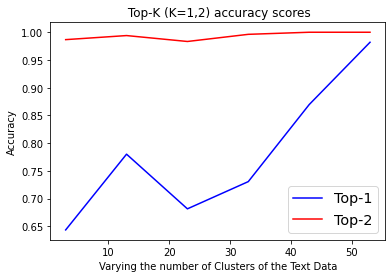

<Figure size 432x288 with 0 Axes>

In [ ]:
#Tag Clustering using Agglomerative and K-medoids Clustering  (clustering texts in data)
import sys
import matplotlib.pyplot as plt
from numpy.ma.core import mean
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
import sys
from sentence_transformers import SentenceTransformer
from sklearn.cluster import AgglomerativeClustering
import numpy as np
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
from sentence_transformers import SentenceTransformer
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import operator
from sklearn.metrics.pairwise import cosine_similarity,cosine_distances
import sys
from scipy import spatial
from sklearn_extra.cluster import KMedoids
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity,cosine_distances
import math
import sys
import random
import operator
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
from sentence_transformers import SentenceTransformer
from sklearn.cluster import AgglomerativeClustering
import numpy as np
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
from sentence_transformers import SentenceTransformer
from sklearn.cluster import AgglomerativeClustering
import numpy as np
from scipy import spatial



def labe_cl(n):
            #Unique Tag list
            embedder = SentenceTransformer('all-MiniLM-L12-v2')
            tagu=[]
            tagu1=[]
            stt=[]
            sent=[]
            relation_sent=[]
            for  sz in rttext_tag2:
                    s=''
                    gh=[]
                    for vb in rttext_tag2[sz]:
                        #if vb not in stt:
                            # s=str(vb)+" "+sz
                            #if vb not in tagu1:
                                #gh.append(vb)
                                #tagu1.append(vb)
                            #gh.append(sz)
                            s=s+str(vb)+" "+str(sz)+" "
                            relation_sent.append(s)
                            if vb not in gh:
                                    gh.append(vb)
                            if vb not in stt:
                                    stt.append(vb)
                            vb1=sz.split()
                            for zx in vb1:
                                    if zx not in gh:
                                        gh.append(zx)
                            sent.append(gh)
                            
            ds=set(stt)
            for kk in ds:
                tagu.append(kk)
           # print(len(tagu))
            for tt in tagu:
                pass

            corpus =tagu#tagss# tagu
            crp_txt={}
            corpus_embeddings = embedder.encode(corpus)
            for sentence, embedding in zip(tagu, corpus_embeddings):
                lst=embedding.tolist()
                crp_txt[sentence]=lst
            vectorizer = TfidfVectorizer()
            X = vectorizer.fit_transform(corpus)

            num_clusters=5 #{‘random’, ‘heuristic’, ‘k-medoids++’, ‘build’
            kmedoids = KMedoids(n_clusters=5,metric='cosine', method='alternate',init='k-medoids++', max_iter=500000, random_state=1).fit(X)
            cluster_assignment,cn=kmedoids.labels_,kmedoids.cluster_centers_

            clustered_sentences = {}
            clustered_sentences1 = {}
            for sentence_id, cluster_id in enumerate(cluster_assignment):
                if cluster_id not in clustered_sentences:
                    clustered_sentences[cluster_id] = []
                    clustered_sentences1[cluster_id] = []
                if corpus[sentence_id] in tagu:
                        clustered_sentences[cluster_id].append(corpus[sentence_id])
                if len(vectorizer.inverse_transform(cn[cluster_id])[0])==2:
                    gh=str(vectorizer.inverse_transform(cn[cluster_id])[0][0])+"-"+str(vectorizer.inverse_transform(cn[cluster_id])[0][1])
                
                    if gh not in clustered_sentences1[cluster_id]:
                        clustered_sentences1[cluster_id].append(gh)
                    
                if len(vectorizer.inverse_transform(cn[cluster_id])[0])==1:
                    for vv in vectorizer.inverse_transform(cn[cluster_id])[0]:
                        if vv not in clustered_sentences1[cluster_id]:
                                clustered_sentences1[cluster_id].append(vv)
                    
            final_clut1=clustered_sentences


            final_cluh={}
            for kk in final_clut1:
                    final_cluh[kk]=clustered_sentences1[kk]
            '''
            final_cluh={}
            for kk in final_clut1:
                gh=[]
                if len(final_clut1[kk])%2==0:
                        pp=len(final_clut1[kk])//2
                        #gh.append(final_clut1[kk][pp-1])
                        gh.append(final_clut1[kk][pp])
                        final_cluh[kk]=gh         
                elif len(final_clut1[kk])%2!=0:
                        pp=len(final_clut1[kk])//2
                        gh.append(final_clut1[kk][pp])
                        final_cluh[kk]=gh

            '''
            for t in final_clut1:
               pass# print(final_cluh[t])
            #Re-assigning the labels 

            embedder = SentenceTransformer('all-MiniLM-L12-v2')


            #final_cluh={}
            rttext_tagh1={}
            rttext_tagh={}
            cc=0
            mptxt={}
            rttag={}
            allid=[]
            truhh=[]
            vbb=[]

            from sklearn.metrics.pairwise import cosine_similarity,cosine_distances
            import numpy as np
            for kk in final_clut1:
                for vz in rttext_tag2:
                    ggh=[]
                    ggh0=[]
                    ggh1=[]
                    ggh11=[]
                    ggh111=[]
                    c=0
                    #corpus_embeddings = embedder.encode(vz)
                    for zx in rttext_tag2[vz]:
                        if zx in final_clut1[kk]:
                            for vb3 in final_cluh[kk]:
                                #if vb3 in sametopic_rl:
                                    #if vz in sametopic_rl[vb3]:
                                            if vb3 not in ggh:
                                                ggh.append(vb3)
                                    #else:
                                        #continue
                            if len(ggh)>0:
                                rttext_tagh1[vz]=ggh
                            break
                        else:
                            continue
                    

            jj=[]
            for vv in rttext_tagh1:
                for jk in rttext_tagh1[vv]:
                    if jk not in jj:
                        jj.append(jk)
            #print(len(jj),len(rttext_tagh1))
            # Clustering the text with pre-processed labels
            snt=[]
            rttext_tagh={}


            truhh=[]
            for jj in rttext_tagh1:
                snt.append(jj)



            embedder = SentenceTransformer('all-MiniLM-L12-v2')#('all-distilroberta-v1')#('all-MiniLM-L12-v2')#('all-distilroberta-v1')#('all-MiniLM-L12-v2')
            # Corpus with example sentences
            corpus = snt
            corpus_embeddings = embedder.encode(corpus)

            #num_clusters = 10

            # Normalize the embeddings to unit length
            corpus_embeddings = corpus_embeddings /  np.linalg.norm(corpus_embeddings, axis=1, keepdims=True)

            # Perform Agglomerative clustering
            clustering_model = AgglomerativeClustering(n_clusters=None,distance_threshold=n) #, affinity='cosine', linkage='average', distance_threshold=0.4)
            clustering_model.fit(corpus_embeddings)
            cluster_assignment,dis = clustering_model.labels_,clustering_model.distances_
            #print(dis)
            clustered_sentences = {}
            for sentence_id, cluster_id in enumerate(cluster_assignment):
                if cluster_id not in clustered_sentences:
                    clustered_sentences[cluster_id] = []

                clustered_sentences[cluster_id].append(corpus[sentence_id])
            final_clut11={}

            for i, cluster in clustered_sentences.items():
                cls=[]
                vc=0
                #f len(cluster)>=10:
                for kk in cluster:
                 if vc<100:
                    if kk not in cls:
                        cls.append(kk)
                        vc=vc+1
                final_clut11[i]=cls
                #print(cluster[0])

                #print("Cluster ", i+1)
                #print(cluster)
                #print("")
            cln=0
            final_clut2={}

            for tt in final_clut11:  
                    if len(final_clut11[tt])>=6:
                    
                            final_clut2[cln]=final_clut11[tt]
                            cln=cln+1
                        # vc=vc+1
            print(len(final_clut2))
            return final_clut2,rttext_tagh1


#Clusteredtext with pre-processed labels
import random   
def lb_txt_cl(final_clut2,rttext_tagh1):
            test={}
            def tagcls_only_cls():
                            rttext_tagh={}     
                            truhh=[]  
                            #tt=random.randint(0,len(final_clut2)-1)

                            for vv in final_clut2[tt11]:
                                                if vv not in rttext_tagh:
                                                    rttext_tagh[vv]=rttext_tagh1[vv]
                            tr=[]
                            for tt in rttext_tagh:
                                #print(rttext_tagh[tt][0])
                                if rttext_tagh[tt][0] not in tr:
                                    tr.append(rttext_tagh[tt][0])
                            s=set(tr)
                            for bb in s:
                                truhh.append(bb)
                            print("Cluster: "+str(tt11))
                            print(len(truhh),len(rttext_tagh))

                            #Accuracy Computation

                            #multi tag

                            from transformers import AutoModelForSequenceClassification, AutoTokenizer
                            import numpy as np
                            import operator
                            import matplotlib.pyplot as plt
                            from transformers import pipeline
                            from pylab import rcParams
                            import sys 
                            import nltk
                            import re
                            import operator
                            #from transformers_interpret import ZeroShotClassificationExplainer
                            zero_shot_classifier = pipeline("zero-shot-classification")#,model='roberta-large-mnli')#model='facebook/bart-large-mnli')#,model='Recognai/zeroshot_selectra_medium')#,model='facebook/bart-large-mnli')
                            #tokenizer = AutoTokenizer.from_pretrained("Recognai/zeroshot_selectra_medium")#("facebook/bart-base-mnli")#("Recognai/zeroshot_selectra_medium")
                            #model = AutoModelForSequenceClassification.from_pretrained("Recognai/zeroshot_selectra_medium")#("facebook/bart-base-mnli")#("Recognai/zeroshot_selectra_medium")
                            #zero_shot_explainer = ZeroShotClassificationExplainer(model, tokenizer)
                            cn=0
                            txt_lbp={}
                            ocl_di={}
                            pred_l={}
                            ocl_dia={}
                            pred_lnk={}
                            ocl_dnk={}
                            pred_tk={}
                            ocl_tk={}
                            all_txt_label_score={}
                            all_txt_label_rank={}

                            # Zero-shot Classification
                            def review_explain(text):
                                    result = zero_shot_classifier(sequences =text,candidate_labels =truhh ,multi_label=True)
                                    
                                    return result['labels'],result['scores']

                            for tt in rttext_tagh:
                                mpd={}
                                nlb=[]
                                mpd_nk={}
                                mpd_tk={}
                                nlb_tk=[]
                                nlb_nk=[]
                                rn={}
                                rsc={}
                                clas,score= review_explain(tt)
                            
                                for bb in range(0,len(clas)):
                                    rsc[clas[bb]]=score[bb]
                                for bb in range(0,len(clas)):
                                    rn[clas[bb]]=bb+1
                                all_txt_label_score[tt]=rsc
                                all_txt_label_rank[tt]=rn
                                for k1 in rttext_tagh[tt]:
                                        for t3 in range(0,len(clas)):
                                            if str(clas[t3])==str(k1):
                                                mpd[k1]=score[t3]
                                for k1 in rttext_tagh[tt]:
                                        for t3 in range(0,len(clas)):
                                            if str(clas[t3])!=str(k1):
                                                if score[t3]>0.5:
                                                    mpd_nk[k1]=score[t3]
                                for k1 in rttext_tagh[tt]:
                                        for t3 in range(0,len(clas)):
                                            if str(clas[t3])==str(k1):
                                                if score[t3]>0.5:
                                                    mpd_tk[k1]=score[t3]
                                
                                dd=sorted(mpd.items(), key=operator.itemgetter(1),reverse=True)
                                dd1=sorted(mpd_nk.items(), key=operator.itemgetter(1),reverse=True)
                                dd2=sorted(mpd_tk.items(), key=operator.itemgetter(1),reverse=True)
                                
                                for zz in dd:
                                    nlb.append(zz[0])
                                for zz1 in dd1:
                                    nlb_nk.append(zz1[0])
                                for zz2 in dd2:
                                    nlb_tk.append(zz2[0])
                                
                                pred_lnk[tt]=nlb_nk #ranked list of the non-original labels has pribability greater than 50%
                                pred_tk[tt]=nlb_tk#ranked list of the original labels has pribability greater than and equal 90% and appear in top N labels
                                ocl_di[tt]=nlb[0:1]#single label with the highest score of the original label
                                ocl_dia[tt]=nlb#ranked list of the original label
                                

                                txt_lbp[tt]=clas[0:10]
                                pred_l[tt]=clas
                                #test[tt11]=

                            '''
                            Comparing average rank of the predicted original labels with that of it ideal rank positon
                            Coounting the number of non-original labels that have higher probability scores than that of original labels per text

                            '''
                            # average rank
                            ccc=0
                            KK=3 # number of top predicted non-original labels

                            per_txt_ori_rank_cmp={}
                            per_txt_ori_score_avg={}
                            per_txt_nonori_rank_cmp={}
                            per_txt_nonori_pred_rank_avg={}
                            per_txt_nonori_ori_rank_avg={}
                            per_txt_nonori_score_avg={}
                            per_txt_ori_pred_rank_avg={}
                            per_txt_ori_ori_rank_avg={}
                            per_txt_nonori_top_n={}


                            for v in all_txt_label_score:
                            #if v in rttext_tagh:
                                orn=(len(rttext_tagh[v])+1)/2 # Ideal average rank position
                                s=0
                                sc=0
                                cz=0
                                nr=[]
                                sno=0
                                snosc=0
                                for kz in all_txt_label_rank[v]:
                                    if kz not in rttext_tagh[v]:
                                        if cz<KK:
                                                if kz not in nr:
                                                        nr.append(kz)
                                                        #print(kz,rttext_tagu[v],all_txt_label_rank[v][kz],all_txt_label_score[v][kz])
                                                        sno=sno+float(all_txt_label_rank[v][kz])
                                                        snosc=snosc+float(all_txt_label_score[v][kz])
                                                        cz=cz+1
                                #print("\n")
                                per_txt_nonori_top_n[v]=nr
                                per_txt_nonori_rank_cmp[v]=sno/KK
                                per_txt_nonori_score_avg[v]=snosc/KK

                                for kz in all_txt_label_rank[v]:
                                    if kz in rttext_tagh[v]:
                                        s=s+float(all_txt_label_rank[v][kz])
                                        sc=sc+float(all_txt_label_score[v][kz])
                            
                                prn=s/len(rttext_tagh[v])
                                per_txt_ori_score_avg[v]=sc/len(rttext_tagh[v])
                                per_txt_ori_pred_rank_avg[v]=prn
                                per_txt_ori_ori_rank_avg[v]=orn
                                #print(prn,orn)
                                dif=abs(prn-orn)
                                per_txt_ori_rank_cmp[v]=dif
                                if dif<=0.0:
                                    ccc=ccc+1
                            print("Number of texts where the position of the original labels preserved after prediction")
                            print(ccc,len(txt_lbp))
                            print("Percentage of texts where the position of the original labels preserved after prediction")
                            print(ccc/len(txt_lbp))


                            # average scores

                            vvv=0
                            for jj in per_txt_ori_score_avg:
                                if per_txt_nonori_score_avg[jj]>per_txt_ori_score_avg[jj]:
                                            vvv=vvv+1

                            print("Number of non-original labels have higher prediction acores than original labels after prediction")
                            nmmm=vvv     
                            print(vvv)
                            #if tt11==1:
                            # for kk in txt_lbp:
                                #  pass#print(kk,txt_lbp[kk],rttext_tagh[kk])

                            '''
                            Accuracy for the clustered labels
                            '''
                            correct_txt_true_pred=[]
                            def topps(n):
                                            cc=0
                                            vb1=0
                                            for tt in txt_lbp:
                                                    #if vb1 < 1000:
                                                            #vb1=vb1+1 
                                                            try:
                                                                for vb in txt_lbp[tt][0:n]:
                                                                        #print(rttext_tagh[tt][0],vb)
                                                                        if vb in rttext_tagh[tt][0:n]:
                                                                        #if str(vb) ==str(rttext_tagh[tt][0]):
                                                                            cc=cc+1
                                                                            if tt not in correct_txt_true_pred:
                                                                                        correct_txt_true_pred.append(tt)
                                                                            break
                                                                        else:
                                                                            continue

                                                            except:
                                                                continue
                                                            
                                            #txt_lbp
                                            print("Top_"+str(n)+ " Prediction Score: ")
                                            print(cc/len(txt_lbp))
                                            ac=cc/len(txt_lbp)
                                            return ac
                            top=3
                            scc=[]
                            for zz in range(1,top+1):
                                ac=topps(zz)
                                scc.append(ac)
                            return nmmm,scc,per_txt_nonori_score_avg,per_txt_ori_score_avg,correct_txt_true_pred,per_txt_ori_pred_rank_avg,per_txt_ori_ori_rank_avg
                                
                                

            rand_acc={}
            rand_pscr_nonlb={}
            rand_pscr_orlb={}
            rand_predi_rank_orlb={}
            rand_ori_rank_orlb={}
            correct_txt_true_p={}
            count_percl_hosctxt={}
            count_percl_txt={}
            for tt11 in  final_clut2:
                nmmm,scc,per_txt_nonori_score_avg,per_txt_ori_score_avg,correct_txt_true_pred,per_txt_ori_pred_rank_avg,per_txt_ori_ori_rank_avg=tagcls_only_cls()
                rand_acc[tt11]=scc
                rand_pscr_nonlb[tt11]=per_txt_nonori_score_avg
                rand_pscr_orlb[tt11]=per_txt_ori_score_avg
                correct_txt_true_p[tt11]=correct_txt_true_pred
                rand_predi_rank_orlb[tt11]=per_txt_ori_pred_rank_avg
                rand_ori_rank_orlb[tt11]=per_txt_ori_ori_rank_avg
                count_percl_hosctxt[tt11]=nmmm
                count_percl_txt[tt11]=len(final_clut2[tt11])
                print("\n\n")
            return rand_acc,rand_pscr_nonlb,rand_pscr_orlb,rand_predi_rank_orlb,rand_ori_rank_orlb,count_percl_hosctxt,count_percl_txt









s0=[]
b0=[]
noc0=[]
oc0=[]
clsize=[]
for j in range(6,0,-1):
      print("cluster "+str(j)+"\n")
      final_clut2,rttext_tagh1=labe_cl(j)
      rand_acc,rand_pscr_nonlb,rand_pscr_orlb,rand_predi_rank_orlb,rand_ori_rank_orlb,count_percl_hosctxt,count_percl_txt=lb_txt_cl(final_clut2,rttext_tagh1)
      vr_t1=[]
      vr_t2=[]
      vr_t3=[]
      for kk in rand_acc:
            vr_t1.append(rand_acc[kk][0])
            vr_t2.append(rand_acc[kk][1])
            vr_t3.append(rand_acc[kk][2])
      non=[]
      for vv in rand_pscr_nonlb:
          s1=0
          for kk in rand_pscr_nonlb[vv]:
              #s1=0
              #for tx in rand_pscr_nonlb[vv][kk]:
              s1=s1+rand_pscr_nonlb[vv][kk]
          sv=s1/len(rand_pscr_nonlb[vv])
          non.append(sv)
      sv1=mean(non)
      noc0.append(sv1)
      on=[]
      for vv in rand_pscr_orlb:
          s5=0
          for kk in rand_pscr_orlb[vv]:
              #s11=0
              #for tx in rand_pscr_orlb[vv][kk]:
                  s5=s5+rand_pscr_orlb[vv][kk]
          sv2=s5/len(rand_pscr_orlb[vv])
          on.append(sv2)
      sv3=mean(on)
      oc0.append(sv3)


      vb1=mean(vr_t1)
      s0.append(vb1)
      vb2=mean(vr_t2)
      b0.append(vb2)
      clsize.append(len(final_clut2))
        

# Drawing Varying the cluster of the texts  keeping the clusters of class labels fixed to 5


'''
Accuracy
'''


#Geb_b30 = nri#[11, 10, 12, 14, 16, 19, 17, 14, 18, 17]
#years_b30 = range(0,len(nri))
#Geb_a30 = ori#[12, 10, 13, 14, 12, 13, 18, 16,0,0]
#years_a30 = range(0,len(ori))
#print(len(vr_t1))
years_a31 = range(3,55,10)

fig, ax = plt.subplots()
ax.plot(years_a31, s0, label='Top-1', color='blue')
ax.plot(years_a31,b0, label='Top-2', color = 'red')
#ax.plot(years_a31,vr_t3, label='Top-3', color = 'green')
legend = ax.legend(loc='lower right', fontsize='x-large')
plt.xlabel('Varying the number of Clusters of the Text Data')
plt.ylabel('Accuracy')
plt.title(' Top-K (K=1,2) accuracy scores')
plt.show()
plt.savefig("Variation_cluster_labels.pdf")








In [ ]:
# Average score of non-original and original  varying cluster of texts

years_a31 = range(3,55,10)

fig, ax = plt.subplots()
ax.plot(years_a31,noc0, label='Non-Oroginal Class', color='blue')
ax.plot(years_a31,oc0, label='Original Class', color = 'red')
#ax.plot(years_a31,vr_t3, label='Top-3', color = 'green')
legend = ax.legend(loc='lower right', fontsize='x-large')
plt.xlabel('Varying the number of Clusters of the Text Data')
plt.ylabel('Average Probability Score')
plt.title(' Comparison of Original Class and Non-Original Class Concerning Average Probability Score')
plt.show()
plt.savefig("Variation_cluster_labels_probability score.pdf")

In [ ]:
print(s0)
print(b0)

[0.6433333333333334, 0.78, 0.6813605442176871, 0.7304800837159116, 0.8694111302946843, 0.9819444444444445]
[0.9866666666666667, 0.994, 0.9833333333333333, 0.9962292609351434, 1.0, 1.0]
